In [1]:
#import sys
import psycopg2
import pandas as pd
import numpy as np
#import json
import matplotlib.pyplot as plt      # for plots
import seaborn as sns                # for statistical data visualization
from sklearn.decomposition import PCA  # to apply PCA

# allow to display all columns of dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',None)

In [2]:
# Reading Data
psconn1 = psycopg2.connect(host="pixel.ourcloud.ou.edu", port = 5432, database="IBM_MarketScan", user="faa_student", password="deM%9tAch^")
psquery1=pd.read_sql_query('''select * from data_df ;''',psconn1)
df=pd.DataFrame(psquery1)
#print(data_converted_17)
psconn1.close()
df.head()

<ipython-input-2-d5dc91588582>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  psquery1=pd.read_sql_query('''select * from data_df ;''',psconn1)


,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VI,target_VII,target_IX,target_X,target_XIX
0,2028658103,27,1,2,0,0,1,1,0,4,26,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,2,0,0,0,1,1,0
1,1242027101,45,2,4,1,1,0,1,1,5,32,0,0,2,2,0,0,1,0,0,0,1,0,0,0,6,0,0,0,5,0,0,4,0,0,0,0,0,0
2,1323437702,44,2,3,0,1,0,1,0,1,1,0,0,0,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,1590579601,37,2,3,2,0,0,0,2,2,144,0,0,0,1,0,0,1,0,0,1,0,0,2,1,5,0,0,0,1,2,0,6,0,1,0,0,0,1
4,2063654503,20,2,2,3,0,0,3,0,15,137,0,0,0,0,2,3,8,0,0,11,0,3,0,0,0,0,0,0,5,9,0,3,0,1,1,1,0,0


In [3]:
df = df[df['IX']==0]
df.drop('IX',axis = 1,inplace = True)
df.drop(['target_VII','target_X','target_XIX'],axis = 1,inplace = True)
df

<ipython-input-3-d6894920a5d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('IX',axis = 1,inplace = True)
<ipython-input-3-d6894920a5d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['target_VII','target_X','target_XIX'],axis = 1,inplace = True)


,enrolid,age,sex,agegrp,shortstay,mediumstay,longstay,imp_mdc,non_mdc,emer_visits,non_emer_visits,thergrp_count,I,II,III,IV,V,VI,VII,VIII,X,XI,XII,XIII,XIV,XV,XVI,XVII,XVIII,XIX,XX,XXI,XXII,target_VI,target_IX
0,2028658103,27,1,2,0,0,1,1,0,4,26,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,4,0,0,2,0,0,1
1,1242027101,45,2,4,1,1,0,1,1,5,32,0,0,2,2,0,0,1,0,0,1,0,0,0,6,0,0,0,5,0,0,4,0,0,0
5,1795668101,38,1,3,1,0,0,1,0,6,35,1,0,0,0,5,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,2,0,1,1
7,1905296302,47,2,4,1,1,0,2,0,8,128,1,0,4,1,0,0,1,0,0,1,5,0,0,1,0,0,0,6,0,0,1,0,1,1
15,1570990701,61,1,5,0,1,0,1,0,3,25,1,0,0,0,1,0,0,0,0,4,0,0,1,0,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146716,4320836401,63,1,5,1,0,0,1,0,0,23,1,0,0,2,3,0,2,0,0,1,0,0,1,0,0,0,0,1,0,0,2,0,1,1
146720,4841670802,38,2,3,1,0,0,1,0,3,20,1,0,0,1,0,0,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
146724,1323000704,19,2,2,0,0,1,1,0,8,2,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
146725,4187830101,32,2,2,1,0,0,0,1,0,19,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,2,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [5]:
# Set Input Variables and Target Variable
X = df.drop(columns = ['enrolid', 'target_IX'], axis = 1)
y = df['target_IX']

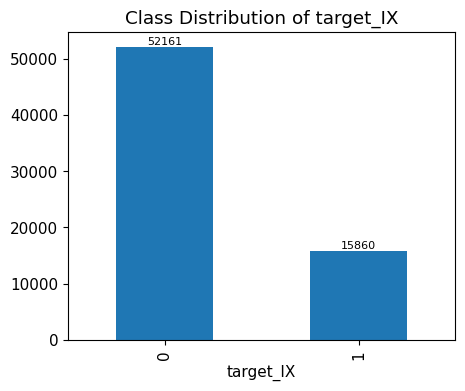

In [6]:
import matplotlib.pyplot as plt

# Set the font size for the plot
plt.rcParams.update({'font.size': 11})

# Create the plot
plt.figure(figsize=(5, 4))
ax = df['target_IX'].value_counts().plot.bar()
ax.set_title('Class Distribution of target_IX')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',  # Aligns text right above the bar
                xytext=(0, 0),  # No vertical offset
                textcoords='offset points',
                fontsize=8)  # Adjust font size here

plt.show()


In [7]:
# use train_test_split function to split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [8]:
# normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

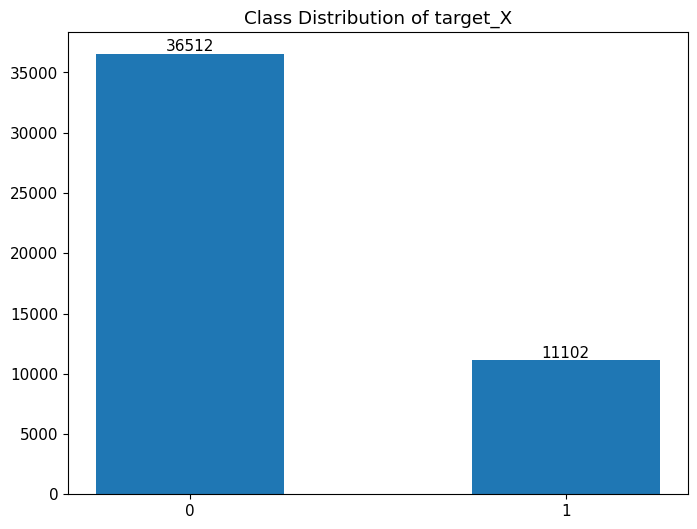

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Search for unique labels and count occurrences of each unique label
labels = list(np.unique(y_train))  # Assuming y_train is defined and contains the class labels
label_count = list(np.unique(y_train, return_counts=True)[1])  # Counts of each label

# Create a bar chart to show label frequency
plt.figure(figsize=(8, 6))  # Adjust the figure size to your preference
bars = plt.bar(labels, label_count, width=0.5)
plt.title('Class Distribution of target_X')

# Set x-ticks to show every integer label within the range of your classes
new_list = range(math.floor(min(labels)), math.ceil(max(labels)) + 1)
plt.xticks(new_list)

# Add labels above each bar for the count of each class
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [10]:
sm = SMOTE(random_state = 1)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train.ravel())

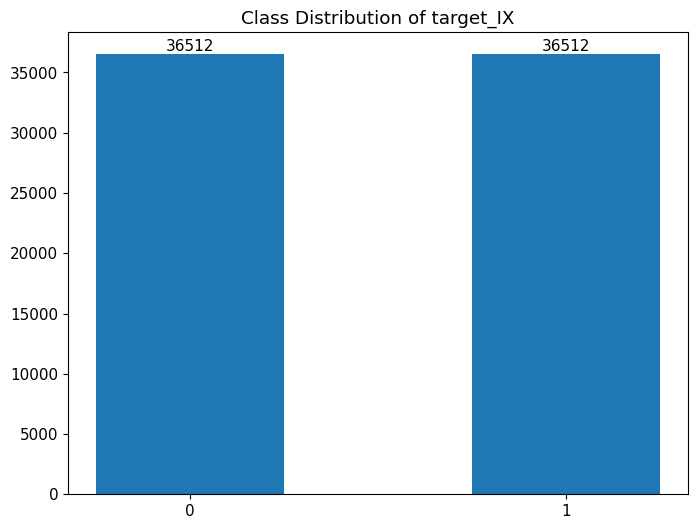

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Assuming y_train_sm is your training set labels, and it has been defined elsewhere
labels = list(np.unique(y_train_sm))  # Unique labels
label_count = list(np.unique(y_train_sm, return_counts=True)[1])  # Count of each label

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as necessary
ax = plt.bar(labels, label_count, width=0.5)  # Plot bar chart
plt.title('Class Distribution of target_IX')

# Set x-ticks to show every integer label within the range of your classes
new_list = range(math.floor(min(labels)), math.ceil(max(labels)) + 1)
plt.xticks(new_list)

# Add labels above each bar
for bar in ax:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()


In [12]:
pca = PCA(n_components=None)  # Setting n_components to None to get explained variance
pca.fit(X_train_sm)
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

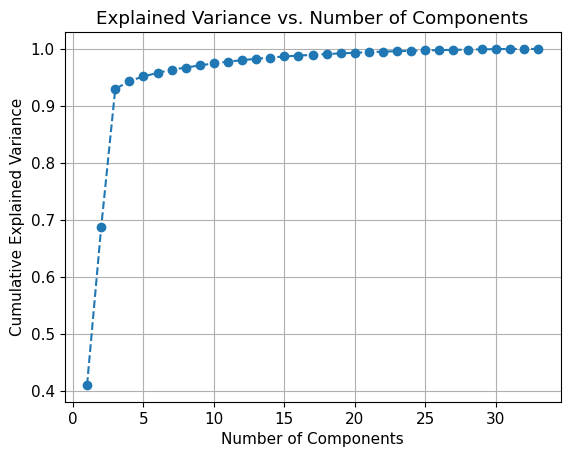

In [13]:
# Feature Selection
import matplotlib.pyplot as plt

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [14]:
cumulative_explained_variance

array([0.4108979 , 0.68701495, 0.92965503, 0.94358506, 0.9518101 ,
       0.95799824, 0.96344377, 0.96739454, 0.97105578, 0.97465872,
       0.9777242 , 0.98028499, 0.98264154, 0.98485623, 0.98676055,
       0.98827187, 0.98966116, 0.99095807, 0.99221326, 0.99331051,
       0.99436938, 0.99524569, 0.99603087, 0.99671786, 0.99735638,
       0.99786995, 0.99836086, 0.99882607, 0.99925167, 0.9996323 ,
       1.        , 1.        , 1.        ])

In [15]:
# taking 95% as threshold we are taking n_components=7
n_components=7
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_sm)
X_test_pca = pca.fit_transform(X_test)

# Logistic Regression

## Logistic Regression without Hyperparameter Tuning

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

# Assume you have already split your PCA-transformed data into X_train_pca, X_test_pca, and y_train, y_test

# Create a logistic regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train_pca, y_train_sm)

LogisticRegression(random_state=42)

### Calculating performance metrics by choosing different threshold values

In [17]:
y_probabilities = model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4094,8096,7553,664,12190,8217,0.597344,0.351507,0.860446,0.499116,0.688897,0.334990,0.517349,0.688897,0.322740
1,0.45,3875,9281,6368,883,13156,7251,0.644681,0.378307,0.814418,0.516632,0.703745,0.351370,0.593073,0.703745,0.344610
2,0.50,3626,10076,5573,1132,13702,6705,0.671436,0.394173,0.762085,0.519596,0.702980,0.355865,0.643875,0.702980,0.344988
3,0.55,3474,10682,4967,1284,14156,6251,0.693684,0.411563,0.730139,0.526404,0.706369,0.363417,0.682600,0.706369,0.354371
4,0.60,3104,11609,4040,1654,14713,5694,0.720978,0.434490,0.652375,0.521593,0.697106,0.364501,0.741837,0.697106,0.349457
5,0.65,2759,12327,3322,1999,15086,5321,0.739256,0.453708,0.579865,0.509088,0.683792,0.361046,0.787718,0.683792,0.339830
6,0.70,2437,12857,2792,2321,15294,5113,0.749449,0.466055,0.512190,0.488034,0.666888,0.352444,0.821586,0.666888,0.323291


### Calculating performance metrics without thresholds

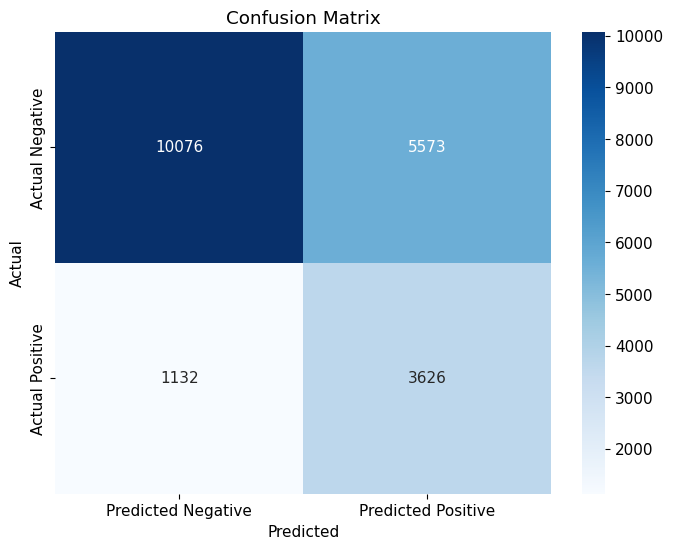

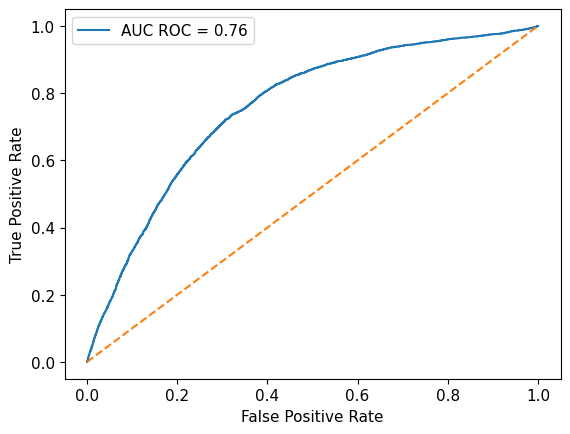

Accuracy: 0.6714362718674964
Precision: 0.3941732797043157
Recall: 0.7620849096258933
F1 Score: 0.5195959016980727
AUC-ROC: 0.7583261836594946
pr_auc 0.4508704050466274


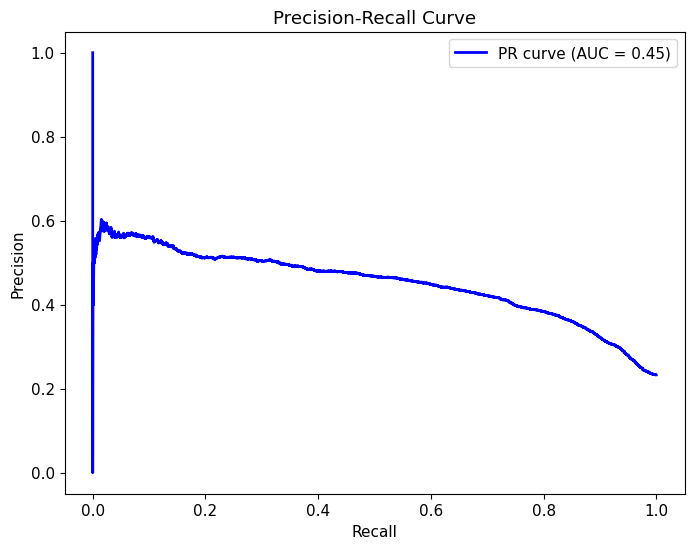

Max F1 Score: 0.5282118389654377
Threshold for Max F1 Score: 0.5597088872370745
ROC-AUC for Max F1 Threshold: 0.7071223174554032


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(model, X_test_pca, y_test)

In [19]:
y_probabilities = model.predict_proba(X_test_pca)[:, 1]
# Calculate the Precision-Recall curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)# Calculate the F1 score for various thresholds
numerator = 2 * recall * precision
denom = recall + precision
f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
max_f1 = np.max(f1_scores)
max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

print("Max F1 Score:", max_f1)
print("Threshold for Max F1 Score:", max_f1_thresh)

# Create binary predictions based on the max F1 threshold
binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

# Calculate the ROC-AUC for the specific threshold
roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

Max F1 Score: 0.5282118389654377
Threshold for Max F1 Score: 0.5597088872370745
ROC-AUC for Max F1 Threshold: 0.7071223174554032


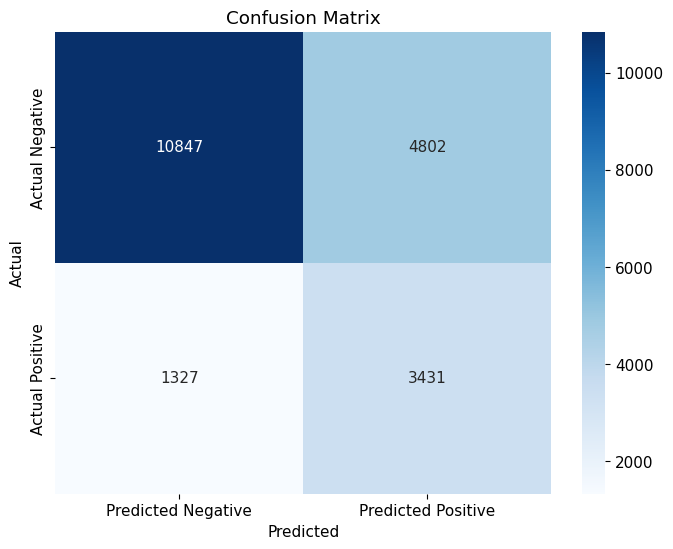

In [20]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
# Predict on the training set
y_train_pred = model.predict (X_train_pca)
# Predict on the testing set
y_test_pred = model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.671436


In [22]:
# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Get the original feature names from PCA transformation
original_feature_names = ['PC'+str(i+1) for i in range(X_train_pca.shape[1])]

# Create a dictionary to map original feature names to their coefficients
feature_coefficients = dict(zip(original_feature_names, coefficients))

# Sort feature coefficients in descending order of absolute values
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature importance
print("Feature Importance:")
for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient:.4f}")


Feature Importance:
PC1: 1.7718
PC7: -1.5664
PC6: 1.2864
PC4: 1.2834
PC5: -0.5707
PC3: -0.3602
PC2: -0.1171


In [23]:
# Get the coefficients of the logistic regression model
coefficients = model.coef_[0]

# Get the PCA components from the PCA object
pca_components = pca.components_

# Calculate feature importance by multiplying coefficients with PCA components
feature_importance = np.abs(coefficients) @ np.abs(pca_components)

# Get the original feature names
original_feature_names = X.columns

# Create a dictionary to map original feature names to their importance
feature_importance_dict = dict(zip(original_feature_names, feature_importance))

# Sort feature importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display feature importance
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importance:
XIII: 2.0658
XV: 1.8650
mediumstay: 1.7768
agegrp: 1.5528
age: 1.3683
shortstay: 1.3426
target_VI: 1.2996
sex: 1.1551
XVIII: 1.1410
imp_mdc: 0.8731
VI: 0.8117
XI: 0.7594
V: 0.6484
XXI: 0.5558
longstay: 0.4343
non_mdc: 0.3629
III: 0.3362
I: 0.2964
IV: 0.2848
X: 0.2574
II: 0.2486
XIX: 0.2137
XIV: 0.2067
XII: 0.1961
emer_visits: 0.1588
thergrp_count: 0.1196
XVI: 0.1095
non_emer_visits: 0.0810
XX: 0.0743
XVII: 0.0631
VII: 0.0511
VIII: 0.0379
XXII: 0.0000


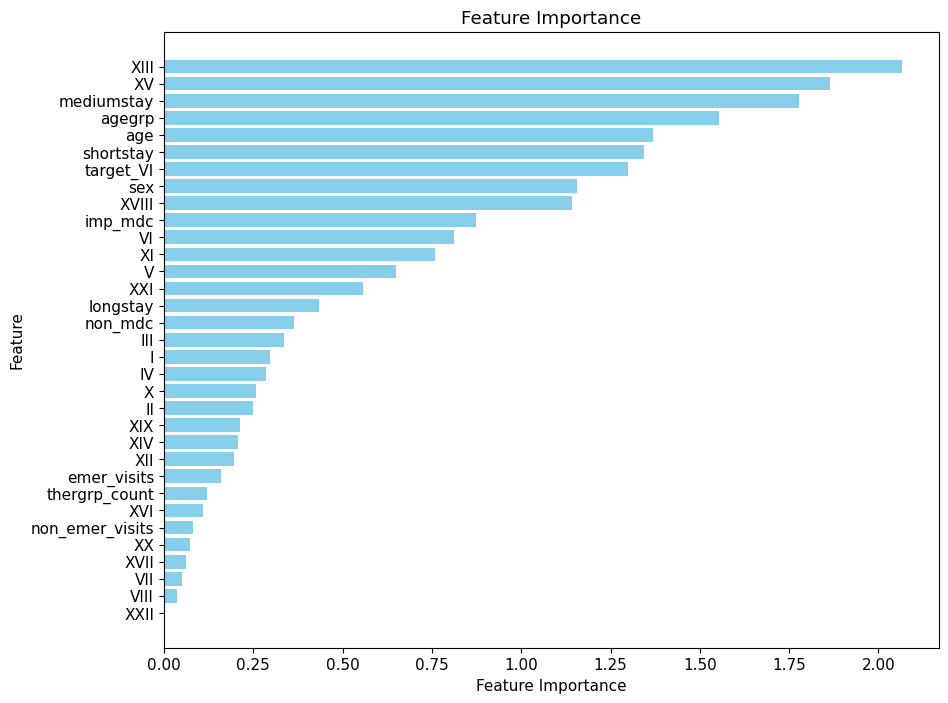

In [24]:
import matplotlib.pyplot as plt

# Extract feature names and importances
features = [x[0] for x in sorted_feature_importance]
importances = [x[1] for x in sorted_feature_importance]

# Create bar plot
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()


## Logistic Regression using GridSearchCV

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,auc
import matplotlib.pyplot as plt

In [ ]:
# Instantiate a logistic regression model
logreg = LogisticRegression(random_state=42)

# Define the hyperparameters to search over
hyperparameters = {'penalty': ['l1', 'l2'],
                   'C': [0.01, 0.1, 1, 10, 100],
                   'solver': ['liblinear', 'saga']}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(logreg, hyperparameters, scoring='roc_auc', cv=5)
gridsearch.fit(X_train_pca, y_train_sm)
best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
# Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [28]:
gridsearch.best_score_

NameError: name 'gridsearch' is not defined

In [29]:
from sklearn.linear_model import LogisticRegression

# Train the model with the best hyperparameters on the full training set
logreg = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', random_state=42)
logreg.fit(X_train_pca, y_train_sm)


LogisticRegression(C=0.01, random_state=42, solver='liblinear')

### Calculating Performace metrics using different threshold values

In [30]:
y_probabilities = logreg.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4136,7978,7671,622,12114,8293,0.593620,0.350301,0.869273,0.499366,0.689541,0.334987,0.509809,0.689541,0.324616
1,0.45,3778,9631,6018,980,13409,6998,0.657078,0.385668,0.794031,0.519170,0.704735,0.354255,0.615439,0.704735,0.346557
2,0.50,3608,10183,5466,1150,13791,6616,0.675798,0.397620,0.758302,0.521689,0.704507,0.357869,0.650713,0.704507,0.348034
3,0.55,3494,10589,5060,1264,14083,6324,0.690106,0.408464,0.734342,0.524940,0.705499,0.361892,0.676657,0.705499,0.352206
4,0.60,2948,11942,3707,1810,14890,5517,0.729652,0.442975,0.619588,0.516604,0.691352,0.363157,0.763116,0.691352,0.345193
5,0.65,2718,12418,3231,2040,15136,5271,0.741706,0.456884,0.571248,0.507705,0.682391,0.360960,0.793533,0.682391,0.339400
6,0.70,2447,12863,2786,2311,15310,5097,0.750233,0.467609,0.514292,0.489841,0.668131,0.353733,0.821969,0.668131,0.325617


### Calculating performance metrics without thresholds

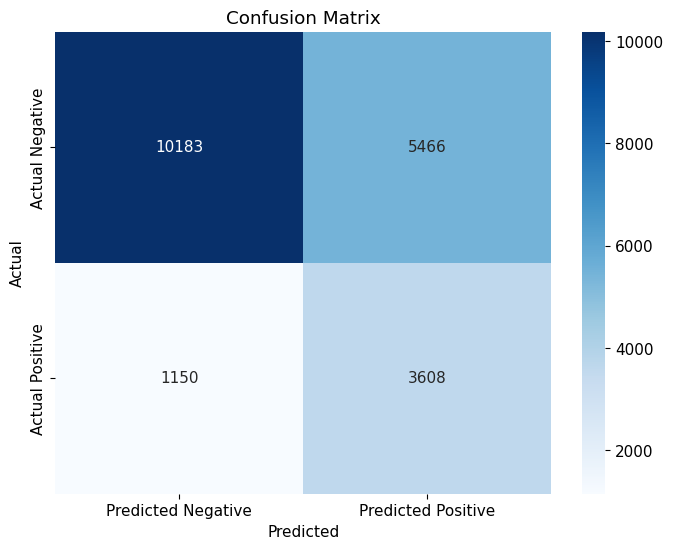

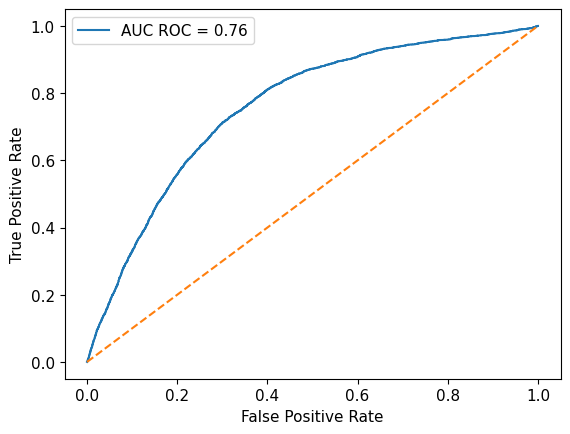

Accuracy: 0.6757975204586661
Precision: 0.3976195724046727
Recall: 0.7583018074821354
F1 Score: 0.5216888374783112
AUC-ROC: 0.7593233103326977
pr_auc 0.4506101672172649


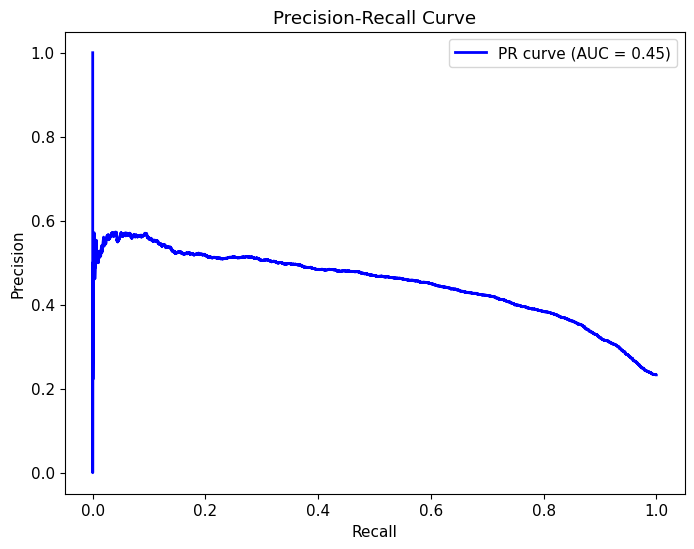

Max F1 Score: 0.5278966617383861
Threshold for Max F1 Score: 0.564236546150494
ROC-AUC for Max F1 Threshold: 0.7062510000612158


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(logreg, X_test_pca, y_test)

In [32]:
# Predict on the training set
y_train_pred = logreg.predict(X_train_pca)
# Predict on the testing set
y_test_pred = logreg.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.675798


In [33]:
# Get the coefficients of the logistic regression model
coefficients = logreg.coef_[0]

# Get the original feature names from PCA transformation
original_feature_names = ['PC'+str(i+1) for i in range(X_train_pca.shape[1])]

# Create a dictionary to map original feature names to their coefficients
feature_coefficients = dict(zip(original_feature_names, coefficients))

# Sort feature coefficients in descending order of absolute values
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Display feature importance
print("Feature Importance:")
for feature, coefficient in sorted_feature_coefficients:
    print(f"{feature}: {coefficient:.4f}")



# import matplotlib.pyplot as plt

# # Get the coefficients of the logistic regression model
# coefficients = logreg.coef_[0]

# # Get the original feature names from PCA transformation
# original_feature_names = ['PC'+str(i+1) for i in range(X_train_pca.shape[1])]

# # Create a dictionary to map original feature names to their coefficients
# feature_coefficients = dict(zip(original_feature_names, coefficients))

# # Sort feature coefficients in descending order of absolute values
# sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# # Display feature importance
# print("Feature Importance:")
# for feature, coefficient in sorted_feature_coefficients:
#     print(f"{feature}: {coefficient:.4f}")

# # Visualize feature importance
# features = [x[0] for x in sorted_feature_coefficients]
# importances = [x[1] for x in sorted_feature_coefficients]

# plt.figure(figsize=(10, 8))
# plt.barh(features, importances, color='skyblue')
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature')
# plt.title('Feature Importance')
# plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
# plt.show()



Feature Importance:
PC1: 1.7209
PC4: 0.7682
PC7: -0.5930
PC6: 0.5408
PC3: -0.3482
PC5: -0.2521
PC2: -0.1127


# Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

In [35]:
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train_pca, y_train_sm)

GaussianNB()

## Calculating performance metrics using different thresholds

In [36]:
y_probabilities = gnb.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3988,7927,7722,770,11915,8492,0.583868,0.340564,0.838167,0.484333,0.672359,0.323181,0.506550,0.672359,0.294751
1,0.45,3835,8514,7135,923,12349,8058,0.605135,0.349590,0.806011,0.487665,0.675036,0.327003,0.544060,0.675036,0.296887
2,0.50,3669,9269,6380,1089,12938,7469,0.633998,0.365111,0.771122,0.495576,0.681714,0.334909,0.592306,0.681714,0.307380
3,0.55,3478,10210,5439,1280,13688,6719,0.670750,0.390041,0.730979,0.508665,0.691709,0.347836,0.652438,0.691709,0.326857
4,0.60,3298,10824,4825,1460,14122,6285,0.692017,0.406008,0.693148,0.512072,0.692411,0.352968,0.691674,0.692411,0.332420
5,0.65,2975,11566,4083,1783,14541,5866,0.712550,0.421508,0.625263,0.503555,0.682176,0.350925,0.739089,0.682176,0.323900
6,0.70,2655,12224,3425,2103,14879,5528,0.729113,0.436678,0.558008,0.489943,0.669572,0.346722,0.781136,0.669572,0.313552


### Calculating performace metrics without thresholds

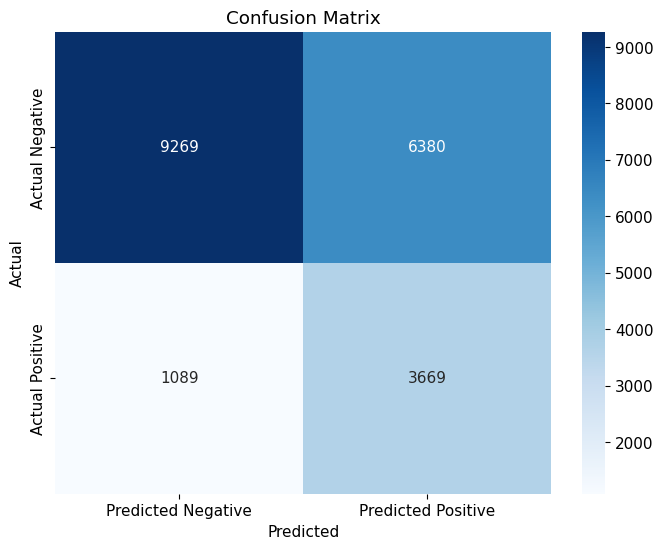

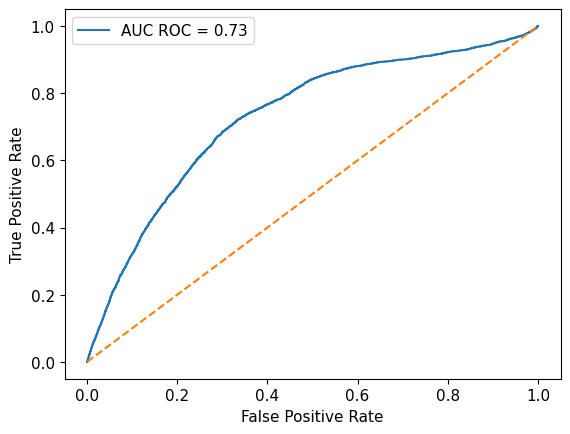

Accuracy: 0.63399813789386
Precision: 0.3651109563140611
Recall: 0.7711223203026482
F1 Score: 0.4955764165597352
AUC-ROC: 0.7311986544027768
pr_auc 0.4353831008354267


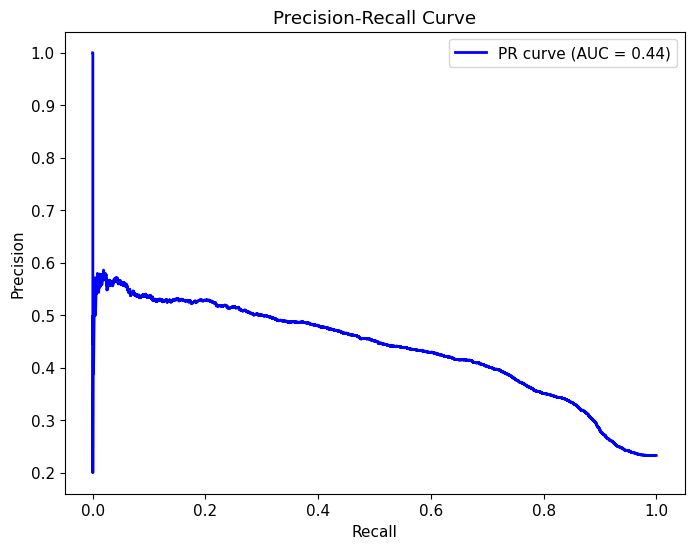

Max F1 Score: 0.5125422662577652
Threshold for Max F1 Score: 0.6086294373402905
ROC-AUC for Max F1 Threshold: 0.6923064902868253


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(gnb, X_test_pca, y_test)

In [38]:
# Predict on the training set
y_train_pred = gnb.predict (X_train_pca)
# Predict on the testing set
y_test_pred = gnb.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.633998


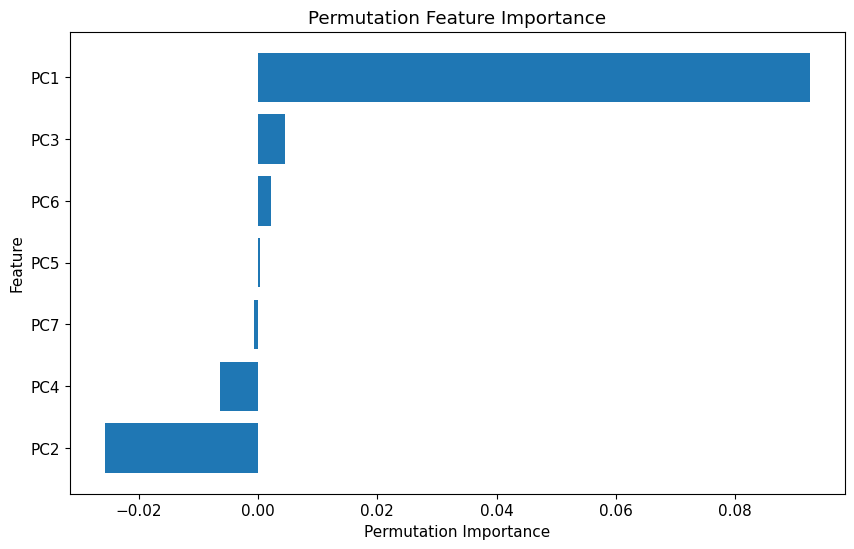

In [40]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance
perm_importance = permutation_importance(gnb, X_test_pca, y_test, n_repeats=10, random_state=42)

# Create feature names matching the number of PCA components
feature_names = [f'PC{i+1}' for i in range(X_test_pca.shape[1])]

# Sort indices by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Get sorted importances and corresponding feature names
perm_importances_sorted = perm_importance.importances_mean[sorted_idx]
sorted_feature_names = [feature_names[i] for i in sorted_idx]

# Plot permutation importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, perm_importances_sorted)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.show()


# XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

## XGBOOST without hyperparameter tuning

In [ ]:
# Create an XGBoost classifier with default hyperparameters
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model on the training data
xgb_classifier.fit(X_train_pca, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Calculating performance metrics using different thresholds

In [ ]:
y_probabilities = xgb_classifier.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3358,9767,5882,1400,13125,7282,0.643162,0.363420,0.705759,0.479783,0.664944,0.325091,0.624129,0.664944,0.280232
1,0.45,3146,10410,5239,1612,13556,6851,0.664282,0.375194,0.661202,0.478734,0.663210,0.327071,0.665218,0.663210,0.280539
2,0.50,2917,11035,4614,1841,13952,6455,0.683687,0.387332,0.613073,0.474734,0.659115,0.327677,0.705157,0.659115,0.278856
3,0.55,2654,11623,4026,2104,14277,6130,0.699613,0.397305,0.557797,0.464067,0.650264,0.324718,0.742731,0.650264,0.270810
4,0.60,2309,12304,3345,2449,14613,5794,0.716078,0.408383,0.485288,0.443527,0.635768,0.318191,0.786248,0.635768,0.256546
5,0.65,1873,13112,2537,2885,14985,5422,0.734307,0.424717,0.393653,0.408595,0.615767,0.308564,0.837881,0.615767,0.237865
6,0.70,1426,13889,1760,3332,15315,5092,0.750478,0.447583,0.299706,0.359013,0.593619,0.297421,0.887533,0.593619,0.218122


### Calculating performace metrics without thresholds

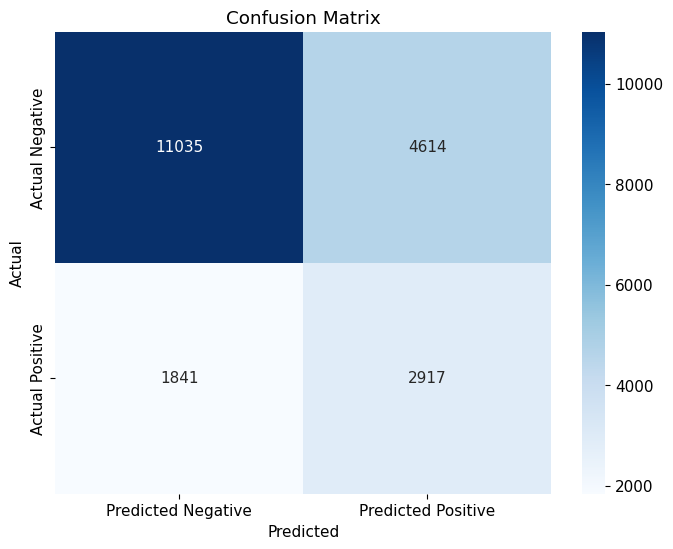

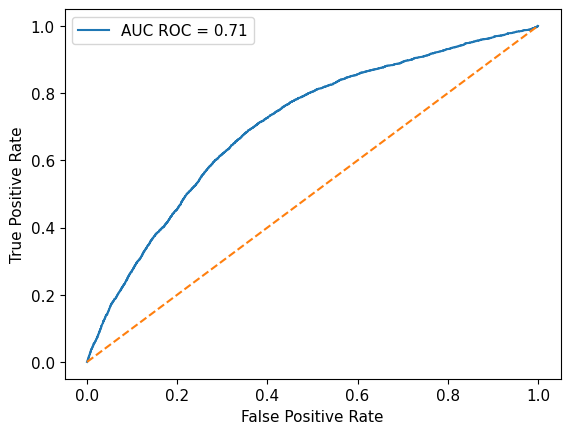

Accuracy: 0.683686970157299
Precision: 0.387332359580401
Recall: 0.6130727196300967
F1 Score: 0.4747335015054114
AUC-ROC: 0.7057575939985019
pr_auc 0.39995764532044886


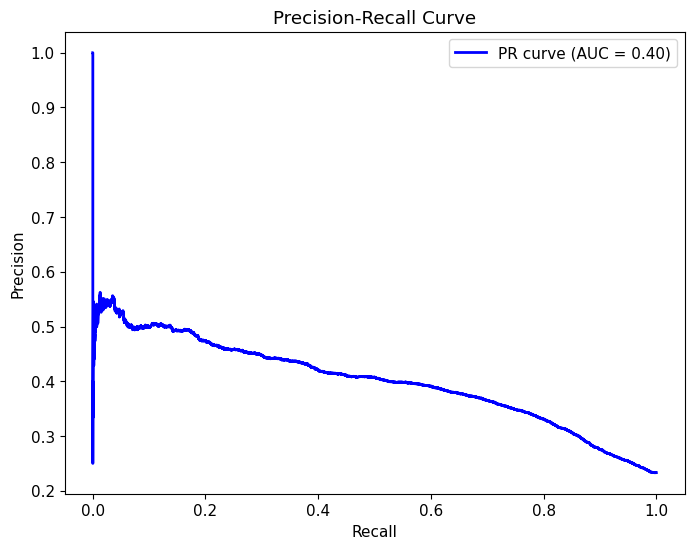

Max F1 Score: 0.48123167155425217
Threshold for Max F1 Score: 0.42157874
ROC-AUC for Max F1 Threshold: 0.6659676411684867


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(xgb_classifier, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = xgb_classifier.predict (X_train_pca)
# Predict on the testing set
y_test_pred = xgb_classifier.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.77
Testing Accuracy:  0.683687


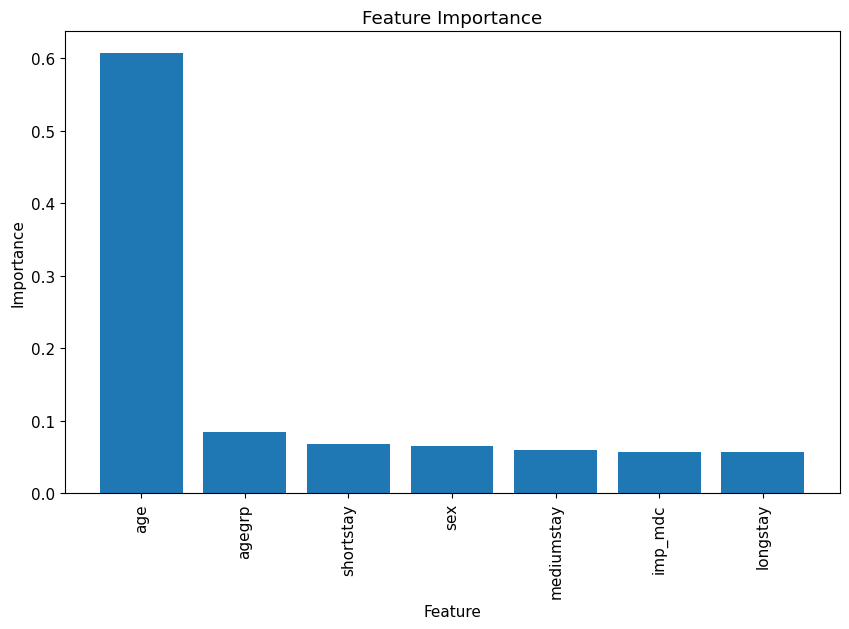

In [ ]:
# Get feature importances from the trained XGBoost classifier
importances = xgb_classifier.feature_importances_

# Get the number of features
n_features = xgb_classifier.n_features_in_

# Get feature names
feature_names = X.columns[:n_features]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(n_features), importances[indices])
plt.xticks(range(n_features), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


## XGBoost Using hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,auc
import matplotlib.pyplot as plt

In [ ]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of boosting rounds
    'max_depth': [3, 4, 5],           # Maximum depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
}

# Use GridSearchCV to find the best hyperparameters
gridsearch = GridSearchCV(xgb_classifier, param_grid, scoring='roc_auc', cv=5, verbose=2)
gridsearch.fit(X_train_pca, y_train_sm)

best_params = gridsearch.best_params_
print(f"Best hyperparameters: {best_params}")
#Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [ ]:
# Train the XGBoost model with the best hyperparameters
best_xgb_classifier = xgb.XGBClassifier(objective="binary:logistic", **best_params, random_state=42)
best_xgb_classifier.fit(X_train_pca, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Calculating performace metrics using different thresholds

In [ ]:
y_probabilities = best_xgb_classifier.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3260,10208,5441,1498,13468,6939,0.659970,0.374670,0.685162,0.484434,0.668736,0.330115,0.652310,0.668736,0.288539
1,0.45,3034,10759,4890,1724,13793,6614,0.675896,0.382887,0.637663,0.478473,0.662591,0.328634,0.687520,0.662591,0.282131
2,0.50,2778,11304,4345,1980,14082,6325,0.690057,0.390004,0.583859,0.467637,0.653103,0.324733,0.722346,0.653103,0.271627
3,0.55,2505,11886,3763,2253,14391,6016,0.705199,0.399649,0.526482,0.454381,0.643010,0.320811,0.759537,0.643010,0.262166
4,0.60,2152,12495,3154,2606,14647,5760,0.717744,0.405579,0.452291,0.427663,0.625372,0.311141,0.798454,0.625372,0.241713
5,0.65,1714,13240,2409,3044,14954,5453,0.732788,0.415717,0.360235,0.385993,0.603148,0.298920,0.846060,0.603148,0.217249
6,0.70,1207,14069,1580,3551,15276,5131,0.748567,0.433082,0.253678,0.319947,0.576357,0.283872,0.899035,0.576357,0.188044


### Calculating performance metrics without thresholds

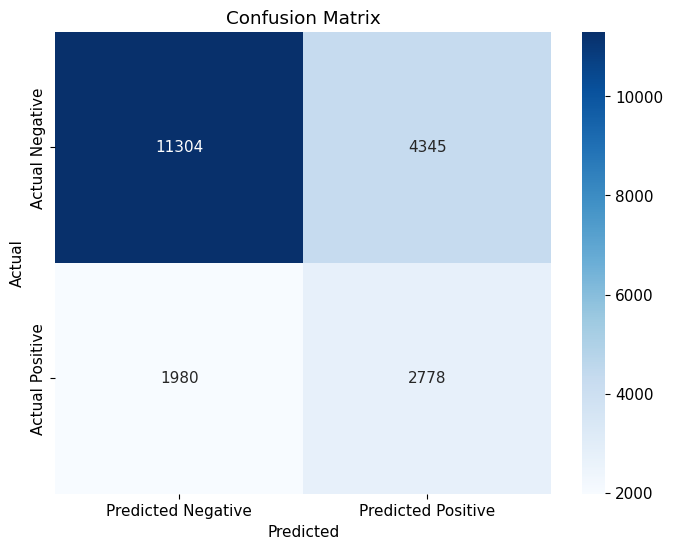

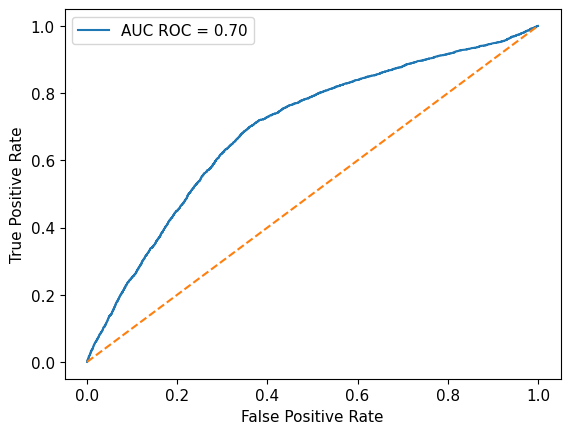

Accuracy: 0.6900573332679962
Precision: 0.39000421170854976
Recall: 0.5838587641866331
F1 Score: 0.46763740425890077
AUC-ROC: 0.6950651550374572
pr_auc 0.3873111196165507


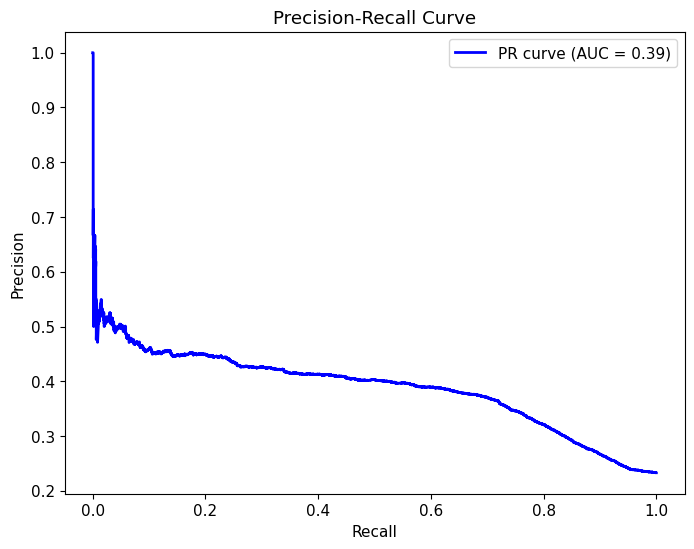

Max F1 Score: 0.48496350364963503
Threshold for Max F1 Score: 0.38417786
ROC-AUC for Max F1 Threshold: 0.6695320695272508


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(best_xgb_classifier, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = best_xgb_classifier.predict (X_train_pca)
# Predict on the testing set
y_test_pred = best_xgb_classifier.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.77
Testing Accuracy:  0.690057


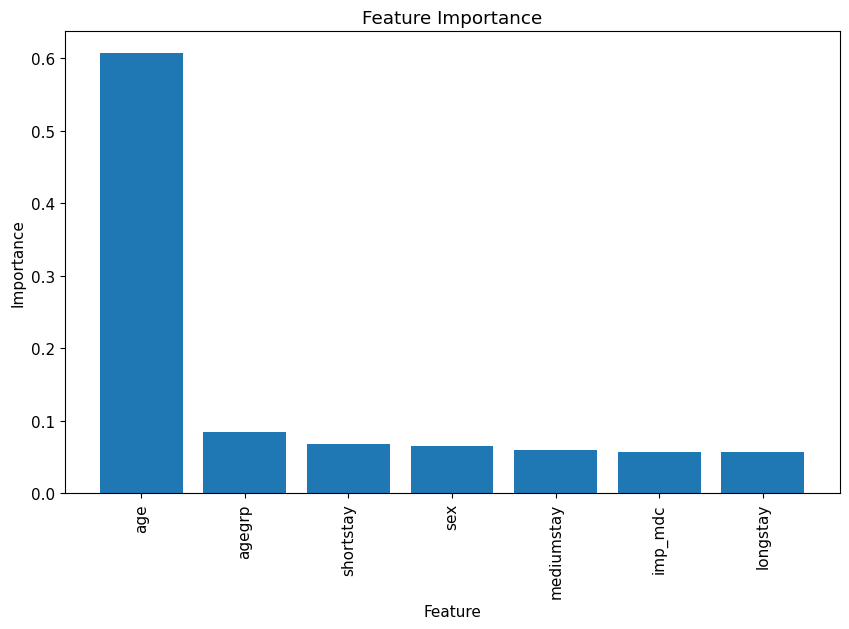

In [ ]:
# Create an XGBoost classifier with default hyperparameters
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the XGBoost model on the training data
xgb_classifier.fit(X_train_pca, y_train_sm)

# Now that the model is trained, you can access its feature importances
importances = xgb_classifier.feature_importances_

# Get the number of features
n_features = X_train_pca.shape[1]  # Assuming X_train_pca is your training data after PCA

# Get feature names
feature_names = X.columns[:n_features]

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(n_features), importances[indices])
plt.xticks(range(n_features), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

## SVM without hyperparameter tuning

In [ ]:
# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', random_state=42,probability=True)

# Train the SVM model on the training data
svm_classifier.fit(X_train_pca, y_train_sm)

SVC(kernel='linear', probability=True, random_state=42)

### Calculating Performace metrics using different threshold values

In [ ]:
y_probabilities = svm_classifier.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3984,8177,7472,774,12161,8246,0.595923,0.347765,0.837327,0.491427,0.679926,0.329121,0.522525,0.679926,0.306639
1,0.45,3744,9650,5999,1014,13394,7013,0.656343,0.384276,0.786885,0.516378,0.701769,0.352070,0.616653,0.701769,0.341612
2,0.50,3472,10603,5046,1286,14075,6332,0.689714,0.407607,0.729718,0.523049,0.703635,0.360456,0.677551,0.703635,0.349218
3,0.55,3243,11259,4390,1515,14502,5905,0.710639,0.424866,0.681589,0.523444,0.700530,0.363823,0.719471,0.700530,0.350472
4,0.60,3160,11476,4173,1598,14636,5771,0.717205,0.430929,0.664145,0.522703,0.698741,0.364505,0.733338,0.698741,0.350290
5,0.65,2697,12387,3262,2061,15084,5323,0.739158,0.452593,0.566835,0.503312,0.679193,0.357540,0.791552,0.679193,0.333286
6,0.70,2275,13119,2530,2483,15394,5013,0.754349,0.473465,0.478142,0.475792,0.658235,0.348058,0.838328,0.658235,0.315393


### Calculating performance metrics without using thresholds

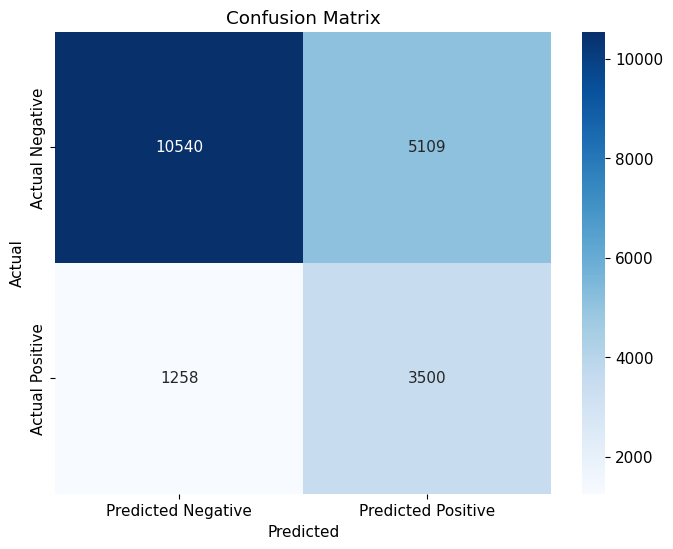

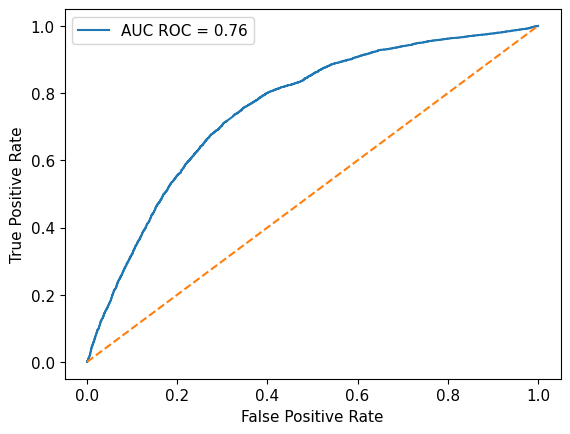

Accuracy: 0.6879992159553094
Precision: 0.40655128354048087
Recall: 0.735603194619588
F1 Score: 0.5236777137727238
AUC-ROC: 0.7559003309546214
pr_auc 0.44592805591029405


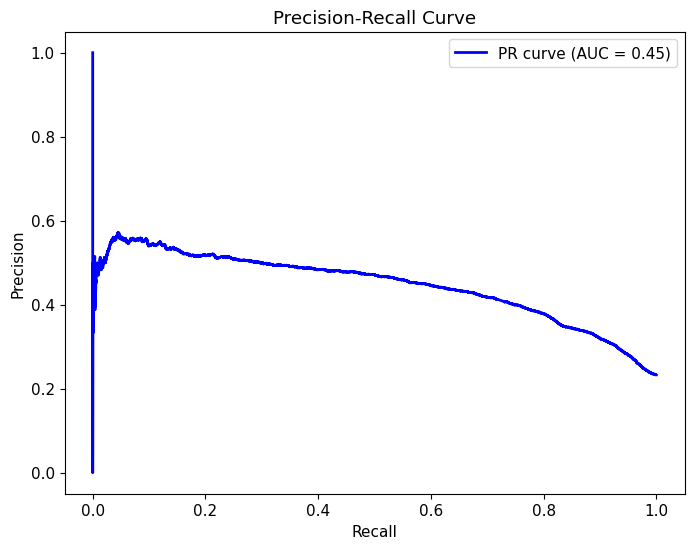

Max F1 Score: 0.525432942455541
Threshold for Max F1 Score: 0.5156083882157756
ROC-AUC for Max F1 Threshold: 0.7041869422069174


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(svm_classifier, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = svm_classifier.predict (X_train_pca)
# Predict on the testing set
y_test_pred = svm_classifier.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.687999


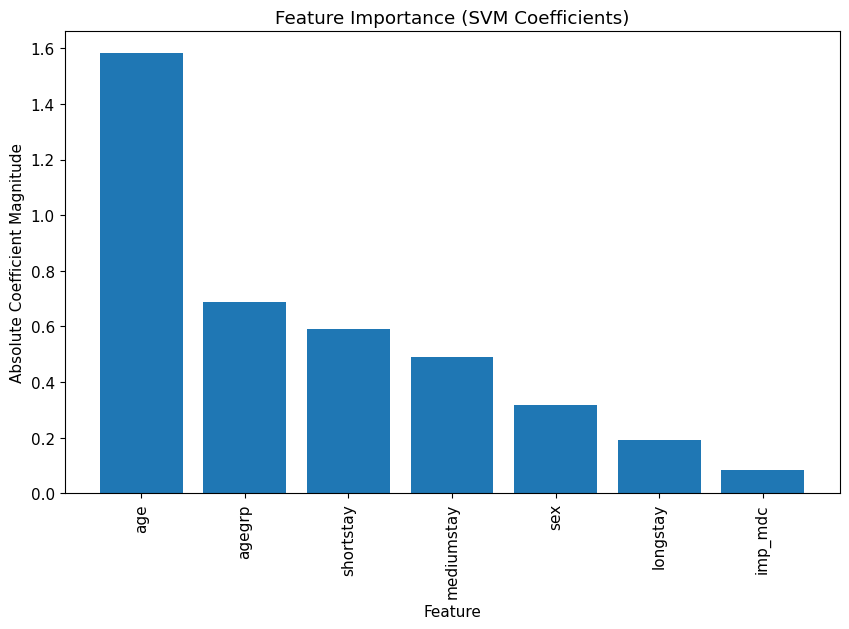

In [ ]:
# Train the SVM model on the training data
svm_classifier.fit(X_train_pca, y_train_sm)

# Get the coefficients of the SVM model
coefficients = svm_classifier.coef_.ravel()

# Get the feature names
feature_names = X.columns

# Sort feature importances by absolute magnitude
importance_indices = np.argsort(np.abs(coefficients))[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance_indices)), np.abs(coefficients[importance_indices]))
plt.xticks(range(len(importance_indices)), feature_names[importance_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient Magnitude')
plt.title('Feature Importance (SVM Coefficients)')
plt.show()


## SVM with hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
svm_classifier = SVC(random_state=42,probability=True)
# Define the hyperparameters to search over
hyperparameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                   'C': [0.1, 1, 10, 100, 1000],
                   'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
                   'degree':[0,1,2,3,4]}
randomsearch = RandomizedSearchCV(svm_classifier, hyperparameters,cv=5,n_iter=2)
randomsearch.fit(X_train_pca, y_train_sm)
best_params = randomsearch.best_params_
print(f"Best hyperparameters: {best_params}")
pd.DataFrame(randomsearch.cv_results_)[['param_kernel','param_C','param_gamma','param_degree','mean_test_score']]
# {'kernel': 'poly', 'gamma': 0.01, 'degree': 1, 'C': 10}

In [ ]:
svm_classifier_best = SVC(random_state=42,probability=True,kernel='poly',C=10,gamma=0.01,degree=1)
svm_classifier_best.fit(X_train_pca, y_train_sm)

SVC(C=10, degree=1, gamma=0.01, kernel='poly', probability=True,
    random_state=42)

### Calculating performace metrics using different thresholds

In [ ]:
y_probabilities = svm_classifier_best.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3880,8652,6997,878,12532,7875,0.614103,0.356716,0.815469,0.496322,0.684174,0.333915,0.552879,0.684174,0.312185
1,0.45,3657,9799,5850,1101,13456,6951,0.659382,0.384664,0.768600,0.512723,0.697387,0.349605,0.626174,0.697387,0.334634
2,0.50,3541,10277,5372,1217,13818,6589,0.677121,0.397285,0.744220,0.518031,0.700470,0.355304,0.656719,0.700470,0.341812
3,0.55,3253,11147,4502,1505,14400,6007,0.705640,0.419471,0.683691,0.519939,0.698002,0.360538,0.712314,0.698002,0.344973
4,0.60,3014,11625,4024,1744,14639,5768,0.717352,0.428247,0.633459,0.511021,0.688159,0.356738,0.742859,0.688159,0.334763
5,0.65,2806,12072,3577,1952,14878,5529,0.729064,0.439605,0.589744,0.503725,0.680583,0.354908,0.771423,0.680583,0.329393
6,0.70,2225,13005,2644,2533,15230,5177,0.746313,0.456973,0.467633,0.462242,0.649338,0.337820,0.831044,0.649338,0.296306


### Calculating performance metrics without thresholds

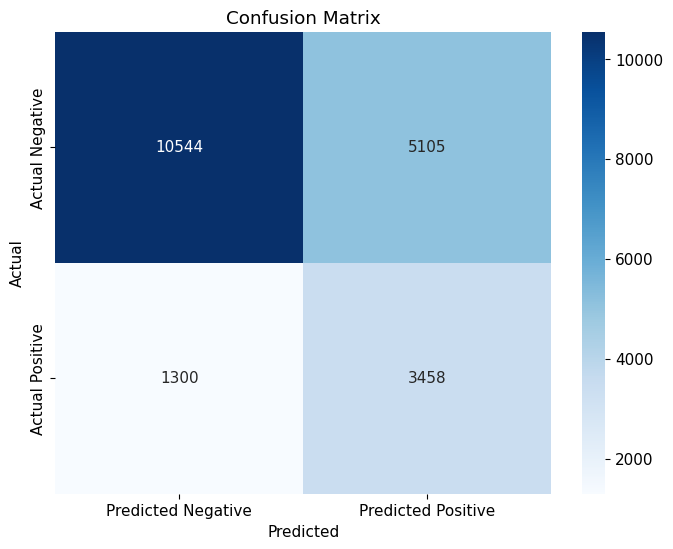

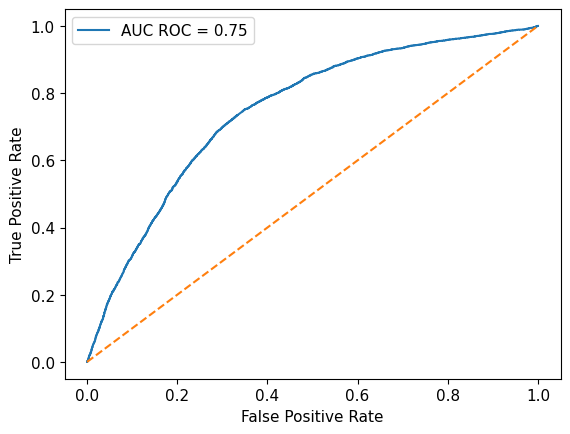

Accuracy: 0.6861371098152594
Precision: 0.40383043325937173
Recall: 0.726775956284153
F1 Score: 0.5191802417235943
AUC-ROC: 0.7493208179189266
pr_auc 0.4386505866984777


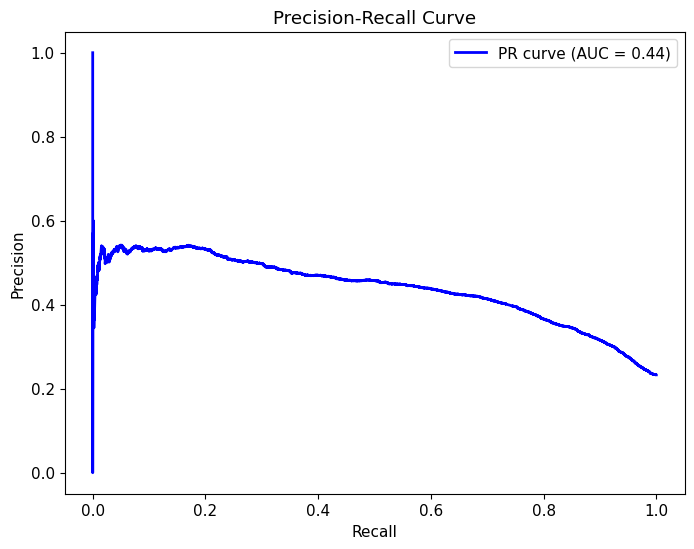

Max F1 Score: 0.5205479452054794
Threshold for Max F1 Score: 0.5473842481552261
ROC-AUC for Max F1 Threshold: 0.6986839227976513


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(svm_classifier_best, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = svm_classifier_best.predict(X_train_pca)
# Predict on the testing set
y_test_pred = svm_classifier_best.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.69
Testing Accuracy:  0.686137


In [ ]:
# Get the coefficients of the SVM classifier
svm_coefficients = svm_classifier_best.coef_

# Assuming your original features are stored in a DataFrame or array, you can match them with their respective coefficients
feature_importance_df = pd.DataFrame({'Feature': X_train_pca.columns, 'Coefficient': np.abs(svm_coefficients).mean(axis=0)})

# Sort the features by their coefficients
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Visualize the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.title('Feature Importance from SVM Coefficients')
plt.show()


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

## Random Forest Without Hyperparameter tuning

In [ ]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to your data
rf_model.fit(X_train_pca, y_train_sm)

RandomForestClassifier(random_state=42)

### Calculating performance metrics using different thresholds

In [ ]:
y_probabilities = rf_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3450,8762,6887,1308,12212,8195,0.598422,0.333753,0.725095,0.457105,0.642501,0.306098,0.559908,0.642501,0.241042
1,0.45,2598,11203,4446,2160,13801,6606,0.676288,0.368825,0.546028,0.440264,0.630960,0.307234,0.715892,0.630960,0.232950
2,0.50,1791,13002,2647,2967,14793,5614,0.724898,0.403560,0.376419,0.389517,0.603635,0.297299,0.830852,0.603635,0.212452
3,0.55,1074,14163,1486,3684,15237,5170,0.746656,0.419531,0.225725,0.293523,0.565383,0.275225,0.905042,0.565383,0.166936
4,0.60,516,14952,697,4242,15468,4939,0.757975,0.425392,0.108449,0.172835,0.531955,0.254003,0.955460,0.531955,0.114290
5,0.65,218,15391,258,4540,15609,4798,0.764885,0.457983,0.045818,0.083301,0.514665,0.243456,0.983513,0.514665,0.082170
6,0.70,82,15561,88,4676,15643,4764,0.766551,0.482353,0.017234,0.033279,0.505805,0.237450,0.994377,0.505805,0.054016


### Calculating performace metrics without thresholds

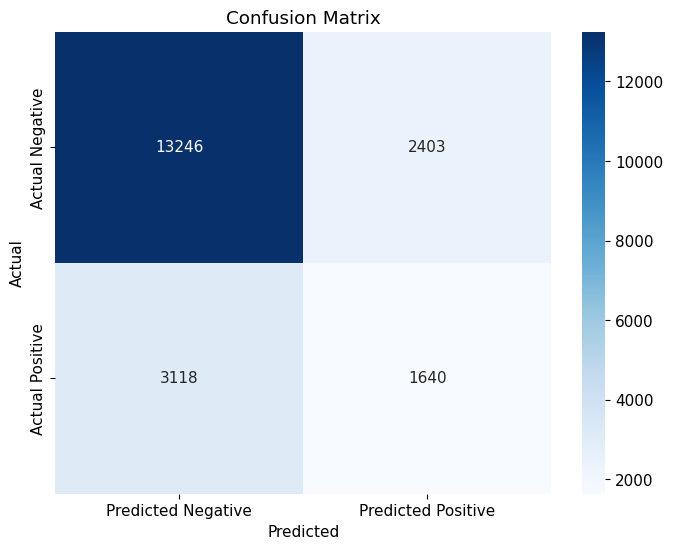

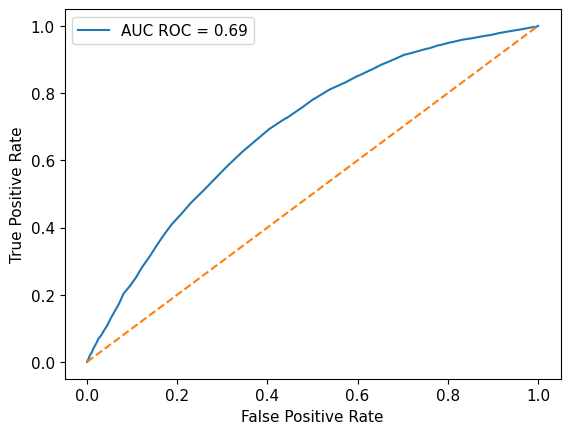

Accuracy: 0.7294555789680012
Precision: 0.40563937670046996
Recall: 0.344682639764607
F1 Score: 0.3726849221679354
AUC-ROC: 0.6902175526151393
pr_auc 0.37068395674502574


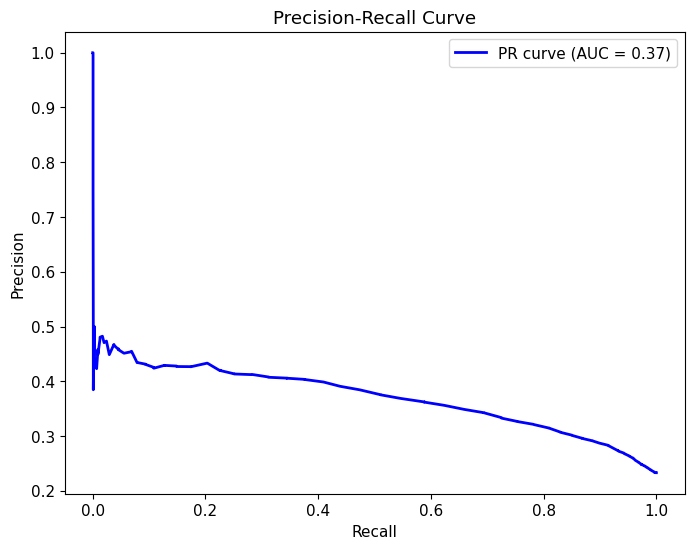

Max F1 Score: 0.4589412255106294
Threshold for Max F1 Score: 0.4066666666666666
ROC-AUC for Max F1 Threshold: 0.6447544239135699


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(rf_model, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = rf_model.predict(X_train_pca)
# Predict on the testing set
y_test_pred = rf_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  1.00
Testing Accuracy:  0.729456


In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Assuming your original features are stored in a DataFrame or array, you can match them with their respective importances
feature_importance_df = pd.DataFrame({'Feature': X_train_pca.columns, 'Importance': feature_importances})

# Sort the features by their importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance (Gini)')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


## Random Forest Using hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,auc

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200],
    'max_features':['sqrt', 'log2', None],
    'criterion':['gini', 'entropy', 'log_loss']
}
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="roc_auc")


grid_search.fit(X_train_pca, y_train_sm)
# took around 5 hours

In [ ]:
import pickle

filename = 'rf_best_grid_total.sav'
pickle.dump(grid_search,open(filename,'wb'))

grid_search_rf1 = pickle.load(open(filename,'rb'))
print(grid_search_rf1.best_params_)

In [ ]:
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")
print(f"Best score: {grid_search.best_score_}")
#Best hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 5, 'n_estimators': 200}
#Best score: 0.8302701668417659

In [ ]:
#best_rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, **best_params)
#best_rf_model.fit(X_pca, y_train_sm)

In [ ]:
best_rf_model = RandomForestClassifier(random_state=42, n_jobs=-1, criterion='gini',max_depth=20,max_features=None,min_samples_leaf=5,n_estimators=200)
best_rf_model.fit(X_train_pca,y_train_sm)

RandomForestClassifier(max_depth=20, max_features=None, min_samples_leaf=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

### Calculating performace metrics using different thresholds

In [ ]:
y_probabilities = best_rf_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3419,9776,5873,1339,13195,7212,0.646592,0.367951,0.718579,0.486690,0.671642,0.330017,0.624704,0.671642,0.291474
1,0.45,2884,11146,4503,1874,14030,6377,0.687509,0.390416,0.606137,0.474928,0.659194,0.328477,0.712250,0.659194,0.280138
2,0.50,2201,12364,3285,2557,14565,5842,0.713726,0.401203,0.462589,0.429715,0.626336,0.310892,0.790082,0.626336,0.240982
3,0.55,1547,13440,2209,3211,14987,5420,0.734405,0.411874,0.325137,0.363401,0.591989,0.291263,0.858841,0.591989,0.200741
4,0.60,1012,14273,1376,3746,15285,5122,0.749008,0.423786,0.212694,0.283235,0.562383,0.273701,0.912071,0.562383,0.164122
5,0.65,523,14923,726,4235,15446,4961,0.756897,0.418735,0.109920,0.174130,0.531764,0.253554,0.953607,0.531764,0.112062
6,0.70,210,15393,256,4548,15603,4804,0.764591,0.450644,0.044136,0.080398,0.513889,0.242754,0.983641,0.513889,0.078628


### Calculating performance metrics without thresholds

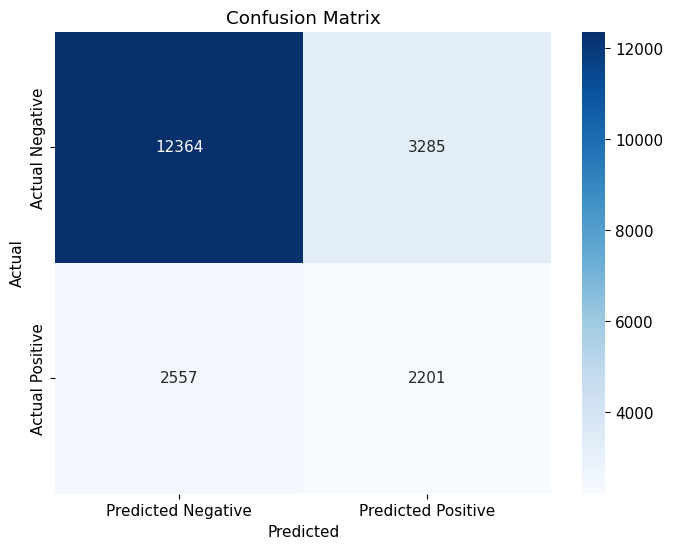

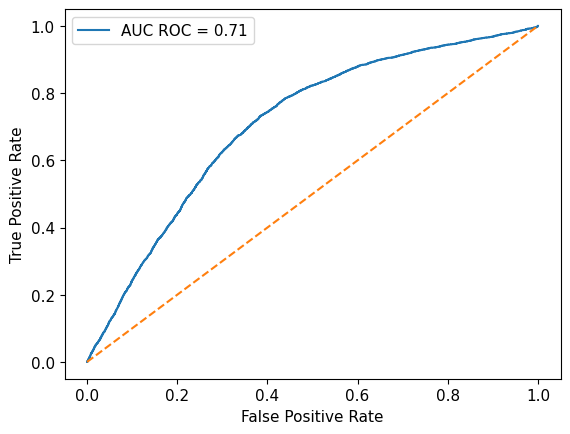

Accuracy: 0.7137256823638948
Precision: 0.4012030623405031
Recall: 0.46258932324506097
F1 Score: 0.4297149550956658
AUC-ROC: 0.7097202001634695
pr_auc 0.38108527410032433


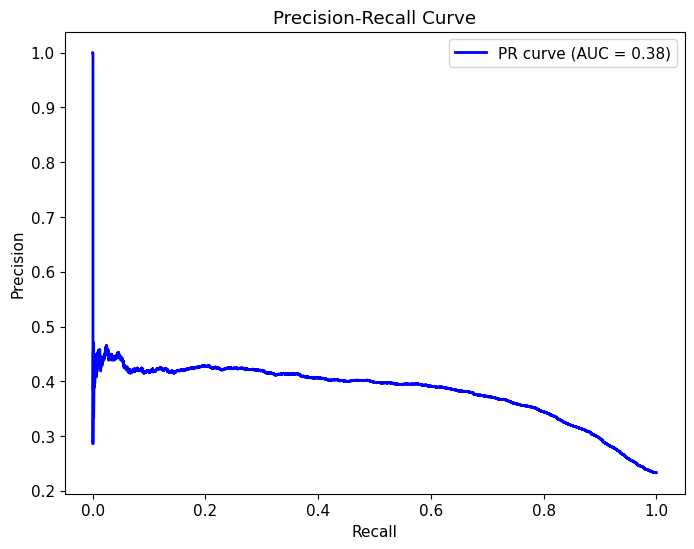

Max F1 Score: 0.48858703262848346
Threshold for Max F1 Score: 0.39345299507452297
ROC-AUC for Max F1 Threshold: 0.6738218268240613


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(best_rf_model, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = best_rf_model.predict(X_train_pca)
# Predict on the testing set
y_test_pred = best_rf_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.89
Testing Accuracy:  0.713726


In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = best_rf_model.feature_importances_

# Assuming your original features are stored in a DataFrame or array, you can match them with their respective importances
feature_importance_df = pd.DataFrame({'Feature': X_train_pca.columns, 'Importance': feature_importances})

# Sort the features by their importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve,precision_recall_curve

## KNN without hyperparameter tuning

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca,y_train_sm)

KNeighborsClassifier()

### Calculating performace metrics using different thresholds

In [ ]:
y_probabilities = knn_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3591,7269,8380,1167,10860,9547,0.532170,0.299975,0.754729,0.429314,0.609616,0.283586,0.464503,0.609616,0.188246
1,0.45,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
2,0.50,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
3,0.55,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
4,0.60,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
5,0.65,1546,12866,2783,3212,14412,5995,0.706228,0.357126,0.324926,0.340266,0.573544,0.273437,0.822161,0.573544,0.152132
6,0.70,1546,12866,2783,3212,14412,5995,0.706228,0.357126,0.324926,0.340266,0.573544,0.273437,0.822161,0.573544,0.152132


### Calculating performance metrics without thresholds

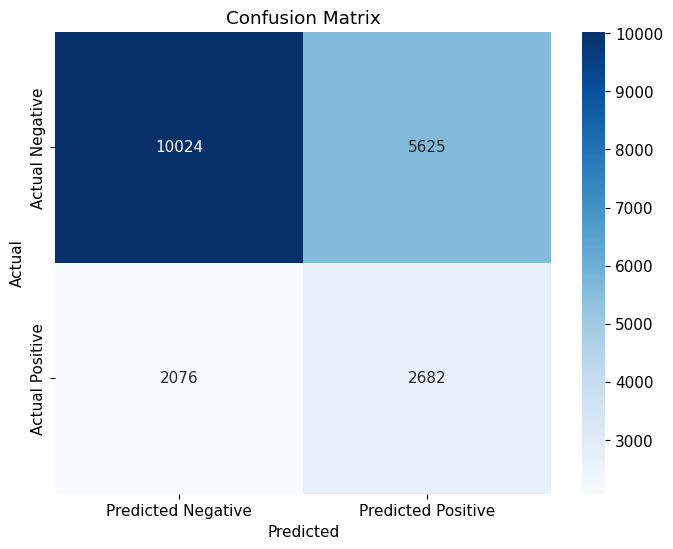

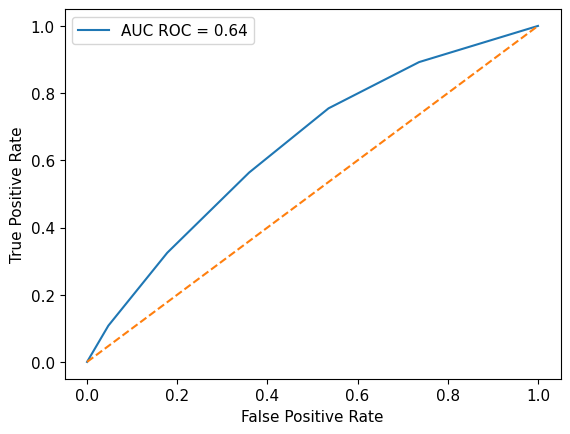

Accuracy: 0.6226294898809233
Precision: 0.3228602383531961
Recall: 0.5636822194199244
F1 Score: 0.4105625717566016
AUC-ROC: 0.6424400972565155
pr_auc 0.3661825455461518


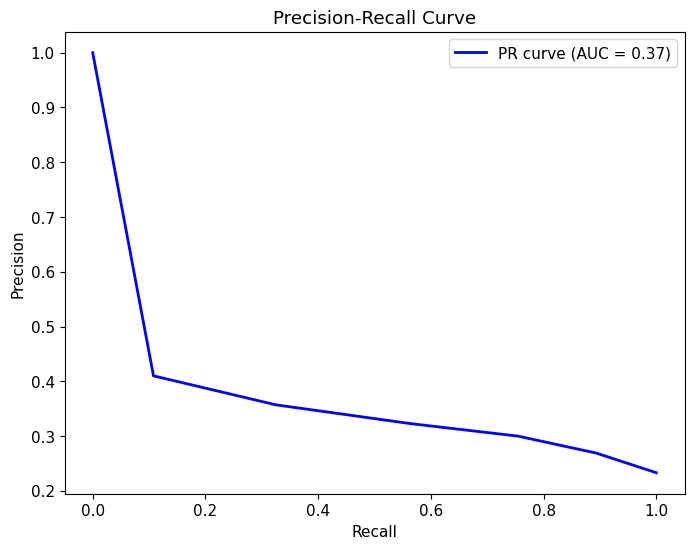

Max F1 Score: 0.4293143642776017
Threshold for Max F1 Score: 0.4
ROC-AUC for Max F1 Threshold: 0.6096157009013223


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(knn_model, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = knn_model.predict (X_train_pca)
# Predict on the testing set
y_test_pred = knn_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.83
Testing Accuracy:  0.622629


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Instantiate SelectKBest with the desired number of features (e.g., 10)
k_best = SelectKBest(score_func=f_classif, k=10)

# Fit and transform your training data to select the top k features
X_train_k_best = k_best.fit_transform(X_train_pca, y_train_sm)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X_train.columns[selected_feature_indices]

print("Selected Features:")
print(selected_features)


## KNN with hyperparamter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,auc
import matplotlib.pyplot as plt

In [ ]:
knn_tune_model = KNeighborsClassifier()
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': range(1, 40),
                   'weights':['uniform', 'distance'],
                   'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size':[20,30,40,50,60]}

# Create a Grid Search object with the KNN model and hyperparameters to tune
grid_search = GridSearchCV(knn_tune_model, hyperparameters, cv=5)

# Fit the Grid Search object to the training data
grid_search.fit(X_train_pca, y_train_sm)

# Print the best hyperparameters found
print(f'Best hyperparameters found: {grid_search.best_params_}')



In [ ]:
best_params=grid_search.best_params_
grid_search.best_score_
# KNeighborsClassifier(leaf_size=20, n_neighbors=2, weights='distance')
#Best hyperparameters found: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
# Train the model with the best hyperparameters on the full training set
knn_best = KNeighborsClassifier(algorithm= 'auto', leaf_size= 20, n_neighbors= 5, weights= 'distance')
knn_best.fit(X_train_pca, y_train_sm)

KNeighborsClassifier(leaf_size=20, weights='distance')

### Calculating performace metrics using different thresholds

In [ ]:
y_probabilities = knn_best.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3005,9040,6609,1753,12045,8362,0.590239,0.312565,0.631568,0.418174,0.604620,0.283308,0.577673,0.604620,0.177247
1,0.45,2682,10021,5628,2076,12703,7704,0.622482,0.322744,0.563682,0.410468,0.602021,0.283655,0.640360,0.602021,0.175605
2,0.50,2682,10024,5625,2076,12706,7701,0.622629,0.322860,0.563682,0.410563,0.602117,0.283720,0.640552,0.602117,0.175780
3,0.55,2680,10030,5619,2078,12710,7697,0.622826,0.322930,0.563262,0.410508,0.602099,0.283722,0.640936,0.602099,0.175775
4,0.60,2040,11562,4087,2718,13602,6805,0.666536,0.332953,0.428752,0.374828,0.583792,0.275944,0.738833,0.583792,0.154597
5,0.65,1546,12865,2784,3212,14411,5996,0.706179,0.357044,0.324926,0.340229,0.573512,0.273410,0.822097,0.573512,0.152053
6,0.70,1546,12866,2783,3212,14412,5995,0.706228,0.357126,0.324926,0.340266,0.573544,0.273437,0.822161,0.573544,0.152132


### Calculating performance metrics without thresholds

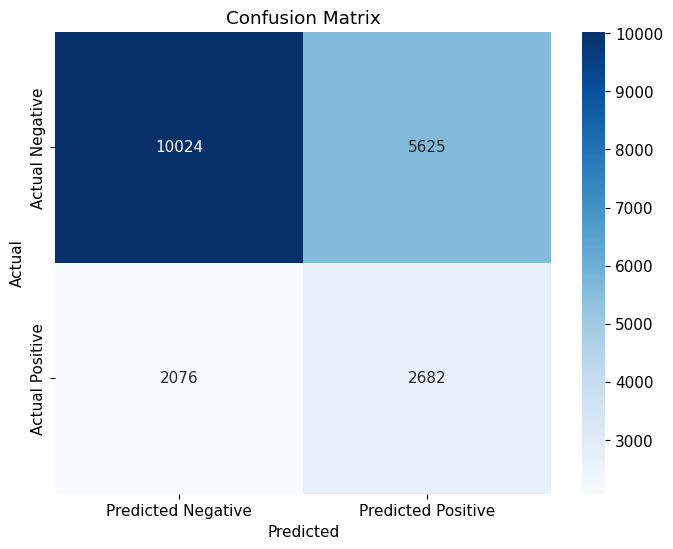

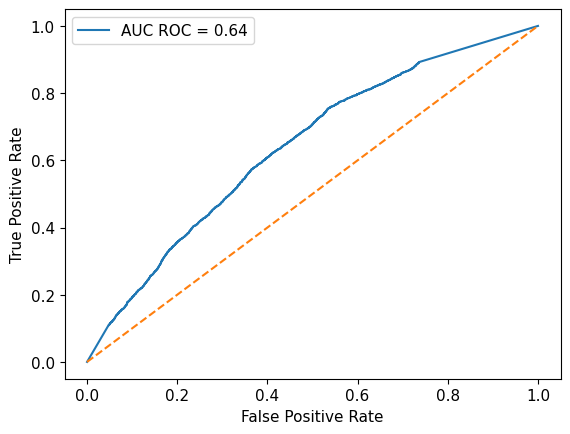

Accuracy: 0.6226294898809233
Precision: 0.3228602383531961
Recall: 0.5636822194199244
F1 Score: 0.4105625717566016
AUC-ROC: 0.6396857973861272
pr_auc 0.36039462532400957


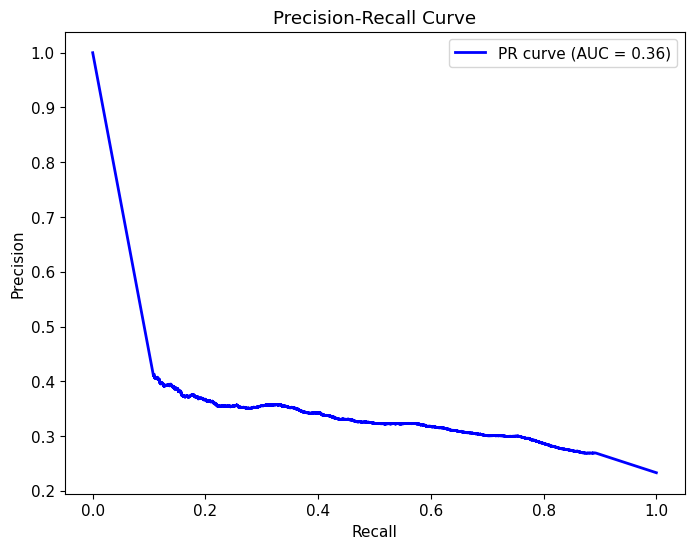

Max F1 Score: 0.42959684172747936
Threshold for Max F1 Score: 0.365915997361308
ROC-AUC for Max F1 Threshold: 0.6099671610585208


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(knn_best, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = knn_best.predict (X_train_pca)
# Predict on the testing set
y_test_pred = knn_best.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  1.00
Testing Accuracy:  0.622629


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import numpy as np

# Sample data generation (replace with your own dataset)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Initialize KNN classifier
knn_model = KNeighborsClassifier()

# Initialize RFE with KNN classifier
rfe = RFE(estimator=knn_model, n_features_to_select=1)

# Fit RFE to the data
rfe.fit(X, y)

# Ranking of features (1 being most important)
feature_ranks = rfe.ranking_

# Print the feature ranks
for rank, feature_name in sorted(zip(feature_ranks, range(X.shape[1])), key=lambda x: x[0]):
    print(f"Feature {feature_name}: Rank {rank}")


# Gradient Boosting

## Gradient Boosting Without Hyperparameter tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_train_pca, y_train_sm)

GradientBoostingClassifier()

### Calculating performace metrics using different thresholds

In [ ]:
y_probabilities = clf.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3929,8211,7438,829,12140,8267,0.594894,0.345650,0.825767,0.487318,0.675233,0.326049,0.524698,0.675233,0.298327
1,0.45,3685,9106,6543,1073,12791,7616,0.626795,0.360285,0.774485,0.491792,0.678188,0.331616,0.581890,0.678188,0.301381
2,0.50,3364,10112,5537,1394,13476,6931,0.660362,0.377935,0.707020,0.492569,0.676598,0.335517,0.646175,0.676598,0.301154
3,0.55,2948,11292,4357,1810,14240,6167,0.697800,0.403559,0.619588,0.488767,0.670584,0.338736,0.721580,0.670584,0.300915
4,0.60,2474,12268,3381,2284,14742,5665,0.722399,0.422545,0.519966,0.466221,0.651957,0.331631,0.783948,0.651957,0.284107
5,0.65,1889,13303,2346,2869,15192,5215,0.744450,0.446045,0.397016,0.420105,0.623551,0.317676,0.850086,0.623551,0.257646
6,0.70,892,14629,1020,3866,15521,4886,0.760572,0.466527,0.187474,0.267466,0.561147,0.276906,0.934820,0.561147,0.177455


### Calculating performance metrics without thresholds

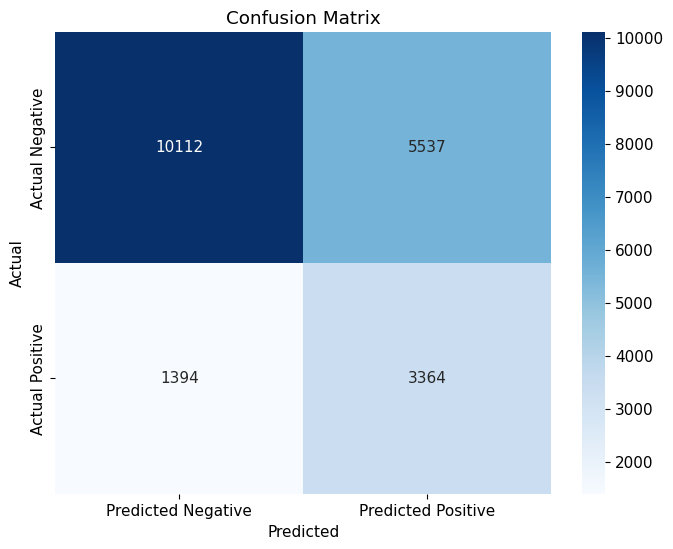

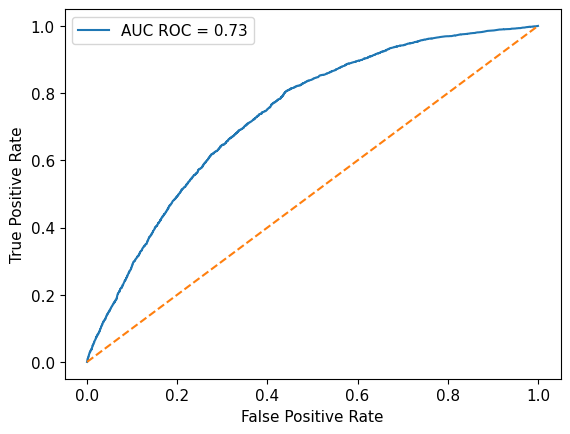

Accuracy: 0.660361640613515
Precision: 0.3779350634760139
Recall: 0.7070197562000841
F1 Score: 0.4925690021231423
AUC-ROC: 0.73428999689516
pr_auc 0.4184643843777288


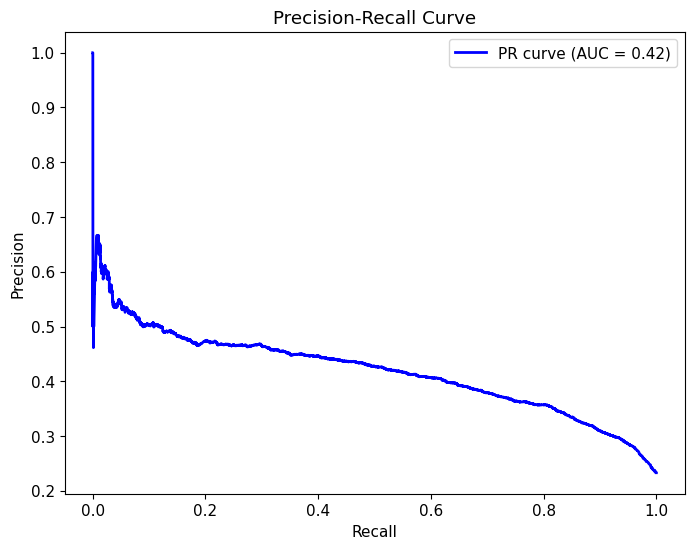

Max F1 Score: 0.49473752179247105
Threshold for Max F1 Score: 0.42528267805017955
ROC-AUC for Max F1 Threshold: 0.6821876503113663


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(clf, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = clf.predict(X_train_pca)
# Predict on the testing set
y_test_pred = clf.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.70
Testing Accuracy:  0.660362


## Gradient Boosting with Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
gb_model = GradientBoostingClassifier()

# Define a parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
}

# Perform Randomized Search Cross-Validation
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    random_state=42
)
random_search.fit(X_train_pca, y_train_sm)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')
#Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}

Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}


In [ ]:
best_gb_model = GradientBoostingClassifier(**best_params)
best_gb_model.fit(X_train_pca, y_train_sm)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                           n_estimators=50, subsample=0.8)

### Calculating performace metrics using different thresholds

In [ ]:
y_probabilities = best_gb_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3774,8824,6825,984,12598,7809,0.617337,0.356071,0.793190,0.491502,0.678530,0.330651,0.563870,0.678530,0.302186
1,0.45,3509,9865,5784,1249,13374,7033,0.655363,0.377596,0.737495,0.499466,0.683943,0.339680,0.630392,0.683943,0.312361
2,0.50,3238,10709,4940,1520,13947,6460,0.683442,0.395940,0.680538,0.500618,0.682431,0.343937,0.684325,0.682431,0.314823
3,0.55,2822,11592,4057,1936,14414,5993,0.706326,0.410234,0.593106,0.485005,0.666928,0.338182,0.740750,0.666928,0.298632
4,0.60,2260,12488,3161,2498,14748,5659,0.722693,0.416897,0.474989,0.444051,0.636498,0.320431,0.798006,0.636498,0.261354
5,0.65,1697,13421,2228,3061,15118,5289,0.740824,0.432357,0.356662,0.390879,0.607145,0.304203,0.857627,0.607145,0.229896
6,0.70,848,14665,984,3910,15513,4894,0.760180,0.462882,0.178226,0.257360,0.557673,0.274099,0.937121,0.557673,0.170621


### Calculating performance metrics without thresholds

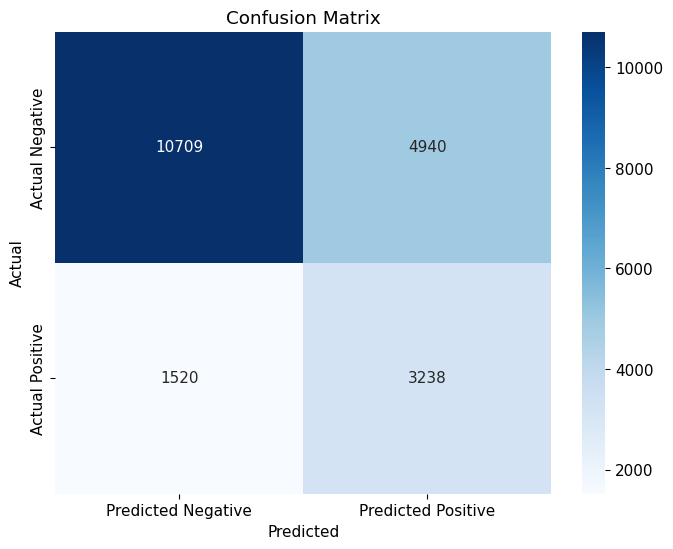

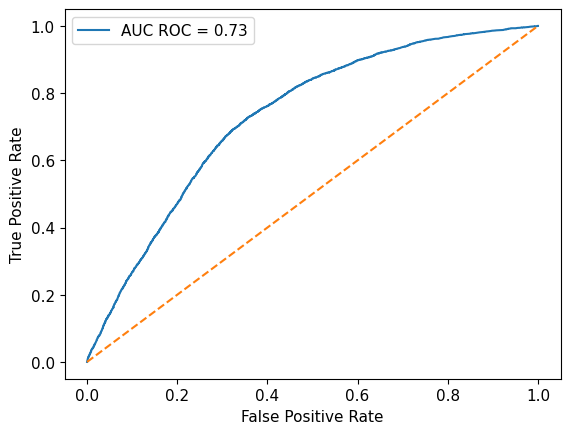

Accuracy: 0.6834419561915029
Precision: 0.3959403277084862
Recall: 0.6805380411937789
F1 Score: 0.5006184291898578
AUC-ROC: 0.7316353170223264
pr_auc 0.4084074759133253


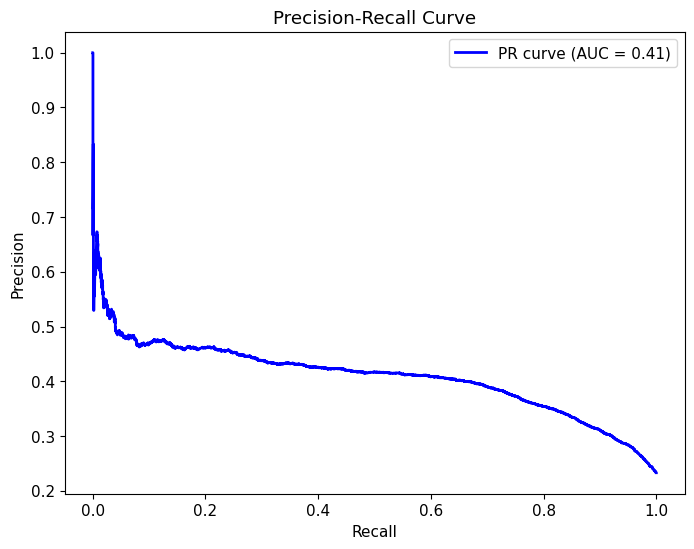

Max F1 Score: 0.5022565593207373
Threshold for Max F1 Score: 0.49456485298683656
ROC-AUC for Max F1 Threshold: 0.6842208518199442


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(best_gb_model, X_test_pca, y_test)

In [ ]:
# Predict on the training set
y_train_pred = best_gb_model.predict (X_train_pca)
# Predict on the testing set
y_test_pred = best_gb_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.72
Testing Accuracy:  0.683442


# MLP

In [41]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500, random_state=42)
mlp.fit(X_train_pca, y_train_sm)

MLPClassifier(max_iter=500, random_state=42)

### Calculating performace metrics using different thresholds

In [42]:
y_probabilities = mlp.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,3842,8503,7146,916,12345,8062,0.604939,0.349654,0.807482,0.487997,0.675420,0.327226,0.543357,0.675420,0.297579
1,0.45,3628,9404,6245,1130,13032,7375,0.638604,0.367467,0.762505,0.495933,0.681719,0.335569,0.600933,0.681719,0.307514
2,0.50,3421,10069,5580,1337,13490,6917,0.661048,0.380069,0.719000,0.497275,0.681214,0.338786,0.643428,0.681214,0.308649
3,0.55,3168,10845,4804,1590,14013,6394,0.686676,0.397391,0.665826,0.497722,0.679421,0.342508,0.693016,0.679421,0.310994
4,0.60,2820,11736,3913,1938,14556,5851,0.713285,0.418833,0.592686,0.490819,0.671319,0.343204,0.749952,0.671319,0.308134
5,0.65,2340,12649,3000,2418,14989,5418,0.734503,0.438202,0.491803,0.463458,0.650049,0.333998,0.808294,0.650049,0.288692
6,0.70,1812,13440,2209,2946,15252,5155,0.747391,0.450634,0.380832,0.412803,0.619837,0.315978,0.858841,0.619837,0.254784


### Calculating performace metrics without using different thresholds

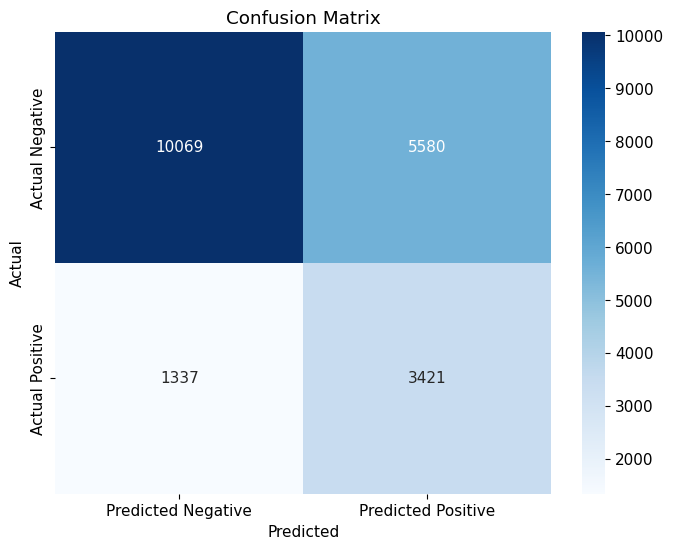

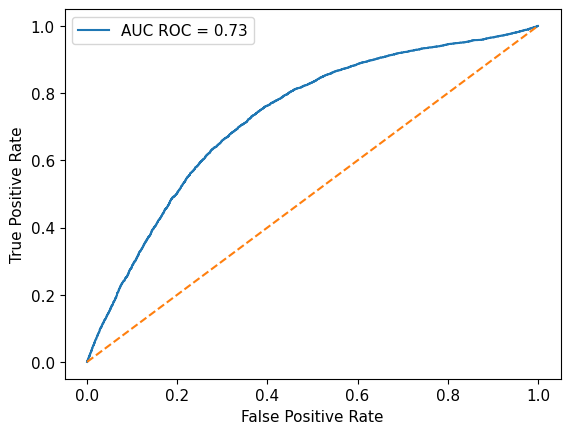

Accuracy: 0.6610476797177439
Precision: 0.38006888123541827
Recall: 0.7189995796553174
F1 Score: 0.4972745112290136
AUC-ROC: 0.7289861033225978
pr_auc 0.4159133369091465


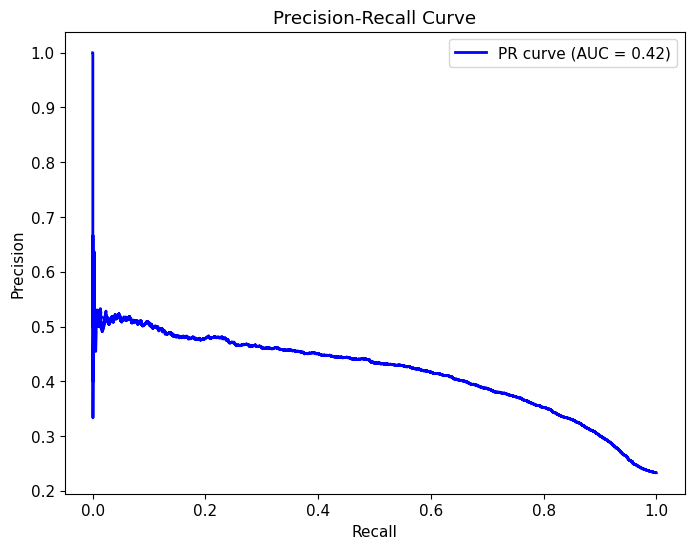

Max F1 Score: 0.49872544609386704
Threshold for Max F1 Score: 0.5212804984872832
ROC-AUC for Max F1 Threshold: 0.6816464521675875


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(mlp, X_test_pca, y_test)

In [44]:
# Predict on the training set
y_train_pred = mlp.predict (X_train_pca)
# Predict on the testing set
y_test_pred = mlp.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.71
Testing Accuracy:  0.661048


In [45]:
# Define a dictionary of hyperparameters for grid search
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50), (50, 50)],
    'activation': ['relu', 'logistic', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Create an MLPClassifier
mlp = MLPClassifier(random_state=42, max_iter=1000)

# Create a RandomSearchCV object
random_search = RandomizedSearchCV(mlp, param_grid, cv=5, scoring='roc_auc')

random_search.fit(X_train_pca, y_train_sm)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')
#Best Hyperparameters: {'solver': 'adam', 'learning_rate_init': 0.01, 'hidden_layer_sizes': (100, 50), 'alpha': 0.01, 'activation': 'relu'}

NameError: name 'RandomizedSearchCV' is not defined

In [46]:
from sklearn.neural_network import MLPClassifier

# First model with specific hyperparameters
best_mlp_model = MLPClassifier(
    max_iter=500,
    random_state=42,
    solver='adam',
    learning_rate_init=0.01,
    hidden_layer_sizes=(100, 50),
    alpha=0.01,
    activation='relu'
)

# Fitting the model with training data
best_mlp_model.fit(X_train_pca, y_train_sm)

# Corrected second model that uses 'best_params'
best_params = {
    'max_iter': 500,
    'random_state': 42,
    'solver': 'adam',
    'learning_rate_init': 0.01,
    'hidden_layer_sizes': (100, 50),
    'alpha': 0.01,
    'activation': 'relu'
}

best_mlp_model = MLPClassifier(**best_params)
best_mlp_model.fit(X_train_pca, y_train_sm)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(100, 50), learning_rate_init=0.01,
              max_iter=500, random_state=42)

### Calculating performace metrics using different thresholds

In [47]:
y_probabilities = best_mlp_model.predict_proba(X_test_pca)[:, 1]
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score

def calculate_metrics_for_thresholds(y_true, y_probabilities, thresholds):
    metrics_list = []

    for custom_threshold in thresholds:
        # Make binary predictions based on the custom threshold
        y_custom_pred = (y_probabilities >= custom_threshold).astype(int)

        # Calculate True Positives, True Negatives, False Positives, and False Negatives
        conf_matrix = confusion_matrix(y_true, y_custom_pred)
        tn, fp, fn, tp = conf_matrix.ravel()

        accuracy = (tp + tn) / (tp + tn + fp + fn)  # Calculate accuracy
        precision = tp / (tp + fp)  # Calculate precision
        recall = tp / (tp + fn)  # Calculate recall
        f1_score = 2 * (precision * recall) / (precision + recall)  # Calculate F1-score
        roc_auc = roc_auc_score(y_true, y_custom_pred)  # Calculate ROC-AUC
        pr_auc = average_precision_score(y_true, y_custom_pred)  # Calculate PR-AUC
        specificity = tn / (tn + fp)  # Calculate specificity
        balanced_accuracy = 0.5 * (tp / (tp + fn) + tn / (tn + fp))  # Calculate balanced accuracy
        mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))  # Calculate MCC

        metrics_list.append({
            "Threshold": custom_threshold,
            "TP": tp,"TN": tn,"FP": fp,"FN": fn,
            "True vals": tp+tn ,"False vals": fp+fn ,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1_score,
            "ROC-AUC": roc_auc,
            "PR-AUC": pr_auc,
            "Specificity": specificity,
            "Balanced Accuracy": balanced_accuracy,
            "MCC": mcc
        })

    # Create a DataFrame to display the metrics for each threshold
    metrics_table = pd.DataFrame(metrics_list)
    return metrics_table

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
metrics = calculate_metrics_for_thresholds(y_test, y_probabilities, thresholds)
display(metrics)

,Threshold,TP,TN,FP,FN,True vals,False vals,Accuracy,Precision,Recall,F1-Score,ROC-AUC,PR-AUC,Specificity,Balanced Accuracy,MCC
0,0.40,4193,7383,8266,565,11576,8831,0.567256,0.336544,0.881253,0.487077,0.676520,0.324267,0.471787,0.676520,0.306132
1,0.45,4025,8364,7285,733,12389,8018,0.607096,0.355880,0.845944,0.500996,0.690209,0.336973,0.534475,0.690209,0.323621
2,0.50,3827,9277,6372,931,13104,7303,0.642133,0.375233,0.804330,0.511734,0.698573,0.347432,0.592817,0.698573,0.335860
3,0.55,3519,10349,5300,1239,13868,6539,0.679571,0.399025,0.739596,0.518377,0.700458,0.355832,0.661320,0.700458,0.342212
4,0.60,3151,11340,4309,1607,14491,5916,0.710099,0.422386,0.662253,0.515796,0.693450,0.358474,0.724647,0.693450,0.339704
5,0.65,2632,12373,3276,2126,15005,5402,0.735287,0.445498,0.553174,0.493531,0.671916,0.350617,0.790658,0.671916,0.320562
6,0.70,1920,13501,2148,2838,15421,4986,0.755672,0.471976,0.403531,0.435078,0.633135,0.329527,0.862739,0.633135,0.281821


### Calculating performace metrics without using different thresholds

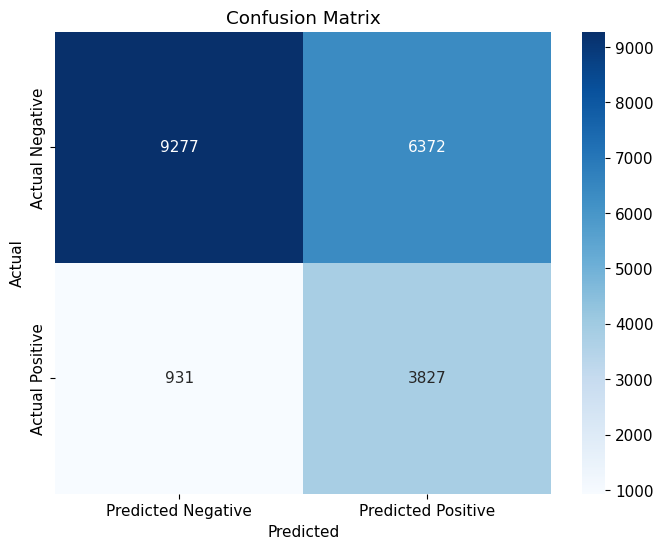

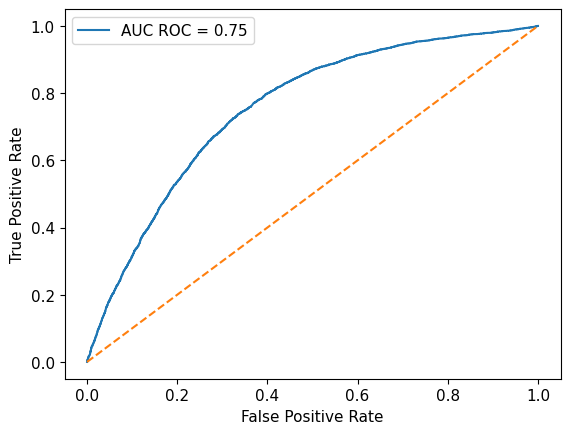

Accuracy: 0.6421326015582888
Precision: 0.3752328659672517
Recall: 0.8043295502311896
F1 Score: 0.5117336364244167
AUC-ROC: 0.7545845143020473
pr_auc 0.4450916230424824


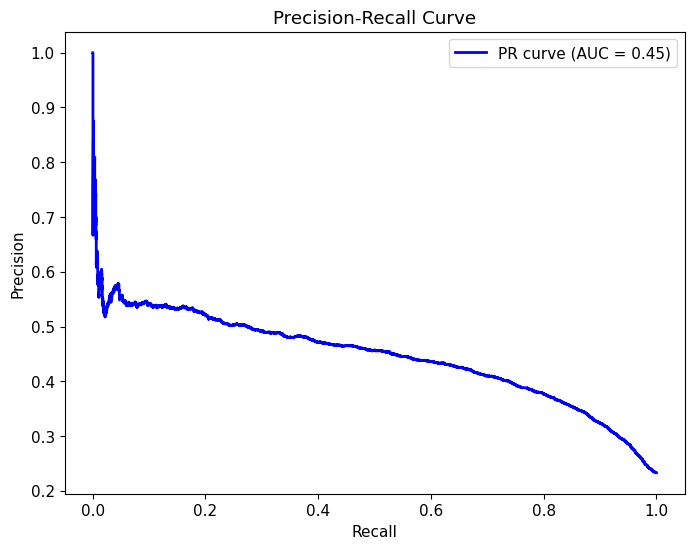

Max F1 Score: 0.519652961146737
Threshold for Max F1 Score: 0.5634146713856785
ROC-AUC for Max F1 Threshold: 0.7004687559051793


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, auc, precision_recall_curve

def evaluate_classification_model(clf, X_test, y_test):
    # Make probability predictions
    y_probabilities = clf.predict_proba(X_test)[:, 1]

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probabilities)

    # Calculate the AUC ROC score
    auc_roc = roc_auc_score(y_test, y_probabilities)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'AUC ROC = {auc_roc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("AUC-ROC:", auc_roc)

    # Calculate the Precision-Recall curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probabilities)
    pr_auc = auc(recall, precision)
    print("pr_auc", pr_auc)

    # Plot the Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Calculate the F1 score for various thresholds
    numerator = 2 * recall * precision
    denom = recall + precision
    f1_scores = np.divide(numerator, denom, out=np.zeros_like(denom), where=(denom!=0))
    max_f1 = np.max(f1_scores)
    max_f1_thresh = pr_thresholds[np.argmax(f1_scores)]

    print("Max F1 Score:", max_f1)
    print("Threshold for Max F1 Score:", max_f1_thresh)

    # Create binary predictions based on the max F1 threshold
    binary_predictions = (y_probabilities >= max_f1_thresh).astype(int)

    # Calculate the ROC-AUC for the specific threshold
    roc_auc_for_max_f1 = roc_auc_score(y_test, binary_predictions)

    print("ROC-AUC for Max F1 Threshold:", roc_auc_for_max_f1)

evaluate_classification_model(best_mlp_model, X_test_pca, y_test)

In [49]:
# Predict on the training set
y_train_pred = best_mlp_model.predict (X_train_pca)
# Predict on the testing set
y_test_pred = best_mlp_model.predict(X_test_pca)
# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train_sm, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy: .2f}')
print(f'Testing Accuracy: {test_accuracy: 2f}')

Training Accuracy:  0.71
Testing Accuracy:  0.642133


In [50]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.5 MB/s eta 0:00:00


In [52]:
import shap

# Assume best_mlp_model and X_train_pca have been defined and the model has been trained

# Create a kernel explainer object using the model's predict function
explainer = shap.KernelExplainer(best_mlp_model.predict, X_train_pca)

# Calculate SHAP values for a sample of the test set (using 100 instances for efficiency)
shap_values = explainer.shap_values(X_test_pca[:100])

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_pca[:100])


  0%|          | 0/100 [00:00<?, ?it/s]

KeyboardInterrupt: 

  0%|          | 0/100 [00:00<?, ?it/s]

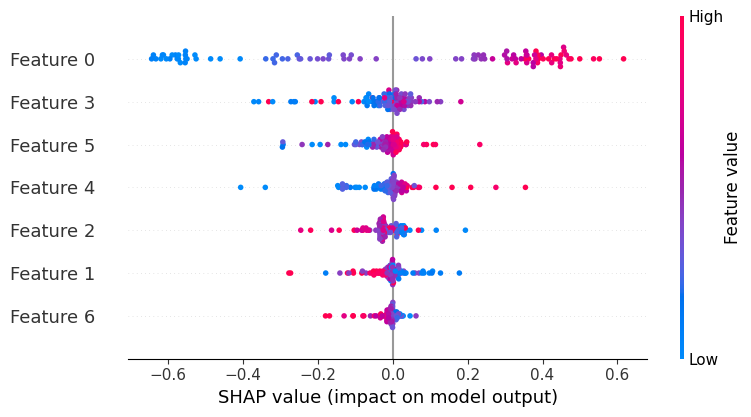

In [53]:
import shap
import numpy as np

# Assume best_mlp_model and X_train_pca have been defined and the model has been trained

# Summarize the background information by clustering it into 50 representative samples
X_train_summary = shap.kmeans(X_train_pca, 50)

# Create a kernel explainer object using the model's predict function and the summarized background
explainer = shap.KernelExplainer(best_mlp_model.predict, X_train_summary)

# Calculate SHAP values for a sample of the test set (using 100 instances for efficiency)
shap_values = explainer.shap_values(X_test_pca[:100])

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_pca[:100])


In [54]:
# Plot the SHAP force plot for a single instance
shap.force_plot(explainer.expected_value, shap_values[0], X_test_pca.iloc[0,:])
# Plot the SHAP dependence plot for a single feature
shap.dependence_plot('Feature_name', shap_values.values, X_test_pca)
# Plot the SHAP interaction summary plot
shap.interaction_summary_plot(shap_values, X_test_pca)
# Plot the SHAP waterfall plot for a single instance
shap.waterfall_plot(shap_values[0])


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'